In [1]:
import pandas as pd
pd.options.display.max_columns = 50

pd.options.mode.chained_assignment = None 

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # Instalation : https://plotly.com/python/getting-started/, also check the jupyterlab extra guide.

# Soil 2018 EDA

In [2]:
df = pd.read_csv('LUCAS-SOIL-2018-v2/LUCAS-SOIL-2018.csv')
df

Depth   POINTID  pH_CaCl2  pH_H2O      EC    OC CaCO3      P     N  \
0      0-20 cm  47862690       4.1    4.81    8.73  12.4     3  < LOD   1.1   
1      0-20 cm  47882704       4.1    4.93    5.06  16.7     1  < LOD   1.3   
2      0-20 cm  47982688       4.1    4.85   12.53  47.5     1   12.3   3.1   
3      0-20 cm  48022702       5.5    5.80   21.10  28.1     3  < LOD     2   
4      0-20 cm  48062708       6.1    6.48   10.89  19.4     2  < LOD   2.2   
...        ...       ...       ...     ...     ...   ...   ...    ...   ...   
18979  0-20 cm  32643634       6.0    6.13   91.40  51.4     2   92.2   5.3   
18980  0-20 cm  32703676       4.9    5.14   51.78  73.9   NaN   81.6   6.9   
18981  0-20 cm  32783608       5.5    5.94   22.40  63.7     1  101.9   6.7   
18982  0-20 cm  32783636       5.3    5.90   10.42  38.3     1    7.3   3.1   
18983  0-20 cm  33023682       4.7    4.97  141.70  98.7     1   33.7  10.1   

            K OC (20-30 cm)  CaCO3 (20-30 cm)  Ox_Al  Ox_Fe NUTS_0 NUTS_1  \
0       101.9           NaN               NaN    NaN    NaN     AT    AT1   
1        51.2           NaN               NaN    NaN    NaN     AT    AT1   
2       114.8           NaN               NaN    NaN    NaN     AT    AT1   
3       165.8           NaN               NaN    NaN    NaN     AT    AT1   
4        42.1           NaN               NaN    NaN    NaN     AT    AT1   
...       ...           ...               ...    ...    ...    ...    ...   
18979  1036.9           NaN               NaN    NaN    NaN     UK    UKN   
18980     225           NaN               NaN    NaN    NaN     UK    UKN   
18981   569.5           NaN               NaN    NaN    NaN     UK    UKN   
18982  1907.9           NaN               NaN    NaN    NaN     UK    UKN   
18983   231.1           NaN               NaN    NaN    NaN     UK    UKN   

      NUTS_2 NUTS_3     TH_LAT    TH_LONG SURVEY_DATE  Elev   LC    LU  \
0       AT11  AT113  47.150238  16.134212    06-07-18   291  C23  U120   
1       AT11  AT113  47.274272  16.175359    06-07-18   373  C21  U120   
2       AT11  AT113  47.123260  16.289693    02-06-18   246  C33  U120   
3       AT11  AT113  47.245693  16.357506    06-07-18   305  C22  U120   
4       AT11  AT113  47.296372  16.416782    05-07-18   335  C22  U120   
...      ...    ...        ...        ...         ...   ...  ...   ...   
18979   UKN1  UKN11  54.713343  -6.563749    24-07-18    50  E20  U111   
18980   UKN1  UKN12  55.091488  -6.625119    02-08-18    34  B55  U111   
18981   UKN1  UKN14  54.515104  -6.259448    18-06-18    50  E20  U111   
18982   UKN1  UKN13  54.759266  -6.358608    05-06-18   122  E20  U370   
18983   UKN1  UKN12  55.208730  -6.156597    28-06-18   143  E20  U111   

        LC0_Desc                              LC1_Desc  \
0       Woodland             Other coniferous woodland   
1       Woodland  Spruce dominated coniferous woodland   
2       Woodland                  Other mixed woodland   
3       Woodland    Pine dominated coniferous woodland   
4       Woodland    Pine dominated coniferous woodland   
...          ...                                   ...   
18979  Grassland    Grassland without tree/shrub cover   
18980   Cropland                   Temporary grassland   
18981  Grassland    Grassland without tree/shrub cover   
18982  Grassland    Grassland without tree/shrub cover   
18983  Grassland    Grassland without tree/shrub cover   

                                                LU1_Desc  
0                                               Forestry  
1                                               Forestry  
2                                               Forestry  
3                                               Forestry  
4                                               Forestry  
...                                                  ...  
18979  Agriculture (excluding fallow land and kitchen...  
18980  Agriculture (excluding fallow land and kitchen...  
18981  Agriculture

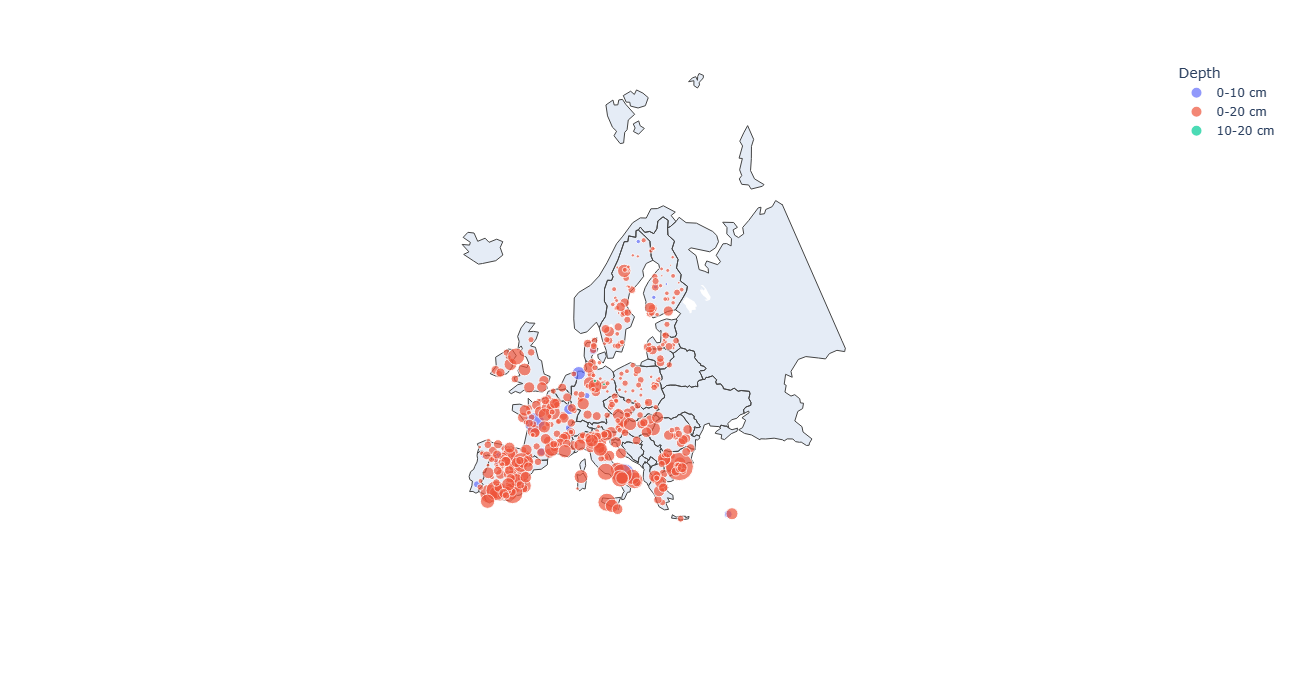

In [3]:
target_var = 'K' # Change the target Variable

df_plot = df.loc[df[target_var].str.isnumeric().fillna(False)]
df_plot[target_var] = df_plot[target_var].astype(float)

fig = px.scatter_geo(df_plot.groupby('Depth').sample(500,replace=True).drop_duplicates(subset=['POINTID']),lat='TH_LAT',lon='TH_LONG',
                    color='Depth',size=target_var)
fig.update_layout(geo_scope='europe')


# Set a scale factor for marker size based on CaCO3 values
fig.update_layout(height=700, width=1200)
fig

# For each country there are multiple data points collected

<AxesSubplot:xlabel='SURVEY_DATE'>

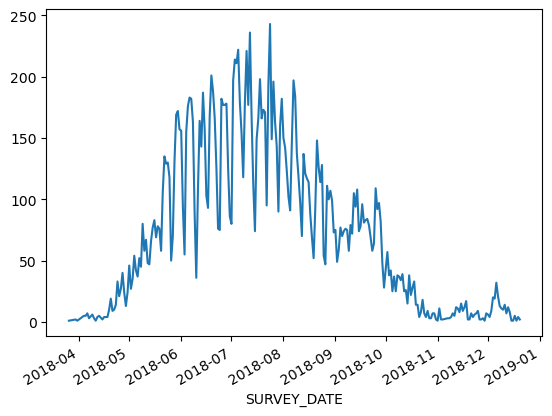

In [4]:
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'],format="%d-%m-%y")
df['SURVEY_DATE'].value_counts().plot()
# Most data collected in spring/summer

In [5]:
country_codes = pd.read_html('https://www.iban.com/country-codes')[0]
country_mapping = dict(zip(country_codes['Alpha-2 code'],country_codes['Country']))
df['COUNTRY'] = df['NUTS_0'].map(country_mapping)

In [6]:
# See Numeric Average per LC1_Desc
list_variables = ['pH_CaCl2','pH_H2O','EC','OC','CaCO3','P','N','K']
for var in list_variables:
    try :
        df_temp = df.loc[df[var].str.isnumeric().fillna(False)]
        df_temp[var] = df_temp[var].astype(float) 
    except :
        df_temp = df.copy()
    display(df_temp.groupby('LC1_Desc')[[var]].describe().sort_values((var,'mean')))

pH_CaCl2                                  \
                                        count      mean       std  min    25%   
LC1_Desc                                                                        
Lichens and Moss                          3.0  3.600000  0.100000  3.5  3.550   
Peatbogs                                 25.0  3.708000  0.721642  2.9  3.300   
Spruce dominated coniferous woodland    801.0  3.978027  0.912519  2.7  3.400   
Spruce dominated mixed woodland         736.0  4.141033  0.900673  2.7  3.600   
Other coniferous woodland               265.0  4.191698  1.294220  2.8  3.400   
...                                       ...       ...       ...  ...    ...   
Tomatoes                                 14.0  7.178571  0.757708  4.7  7.225   
Other citrus fruit                       10.0  7.350000  0.302765  6.9  7.100   
Cotton                                   40.0  7.370000  0.335276  6.5  7.300   
Oranges                                  18.0  7.394444  0.309596  6.3  7.400   
Inland fresh running water                4.0  7.550000  0.129099  7.4  7.475   

                                                        
                                       50%    75%  max  
LC1_Desc                                                
Lichens and Moss                      3.60  3.650  3.7  
Peatbogs                              3.50  4.100  5.9  
Spruce dominated coniferous woodland  3.70  4.200  7.4  
Spruce dominated mixed woodland       3.90  4.400  7.4  
Other coniferous woodland             3.70  4.300  7.6  
...                                    ...    ...  ...  
Tomatoes                              7.45  7.500  7.6  
Other citrus fruit                    7.45  7.575  7.7  
Cotton                                7.50  7.600  7.8  
Oranges                               7.40  7.575  7.7  
Inland fresh running water            7.55  7.625  7.7  

[65 rows x 8 columns]

pH_H2O                                    \
                                      count      mean       std   min     25%   
LC1_Desc                                                                        
Lichens and Moss                        3.0  4.296667  0.187705  4.13  4.1950   
Peatbogs                               25.0  4.496000  0.586593  3.70  4.1400   
Spruce dominated coniferous woodland  801.0  4.678502  0.817903  3.34  4.1100   
Spruce dominated mixed woodland       736.0  4.812880  0.770649  3.38  4.3000   
Rocks and stones                        2.0  4.825000  0.657609  4.36  4.5925   
...                                     ...       ...       ...   ...     ...   
Tomatoes                               14.0  7.757143  0.794156  5.22  7.7425   
Oranges                                18.0  7.842222  0.411290  6.40  7.7275   
Cotton                                 40.0  7.883500  0.391031  6.91  7.6875   
Other citrus fruit                     10.0  7.887000  0.410069  6.98  7.6800   
Inland fresh running water              4.0  8.117500  0.268499  7.85  8.0000   

                                                           
                                        50%     75%   max  
LC1_Desc                                                   
Lichens and Moss                      4.260  4.3800  4.50  
Peatbogs                              4.240  4.8500  6.16  
Spruce dominated coniferous woodland  4.480  4.9300  8.05  
Spruce dominated mixed woodland       4.590  5.1050  7.79  
Rocks and stones                      4.825  5.0575  5.29  
...                                     ...     ...   ...  
Tomatoes                              7.950  8.0425  8.41  
Oranges                               7.925  8.0500  8.22  
Cotton                                8.000  8.1800  8.41  
Other citrus fruit                    8.045  8.1925  8.26  
Inland fresh running water            8.065  8.1825  8.49  

[65 rows x 8 columns]

EC                                 \
                                     count        mean        std     min   
LC1_Desc                                                                    
Sand                                   5.0    6.223000   3.812171    1.66   
Rocks and stones                       2.0    6.540000   3.634529    3.97   
Pine dominated mixed woodland        592.0    9.772162  10.831449    1.77   
Pine dominated coniferous woodland  1263.0    9.782930  14.334964    1.47   
Clovers                               42.0   10.986905   5.116483    4.68   
...                                    ...         ...        ...     ...   
Other bare soil                      628.0   30.330852  54.796812    2.68   
Other fresh vegetables                44.0   31.367500  43.747090    5.63   
Pear fruit                            20.0   40.297500  62.225854    4.93   
Other citrus fruit                    10.0   47.180000  54.265183   15.61   
Salines                                1.0  377.000000        NaN  377.00   

                                                                         
                                         25%      50%       75%     max  
LC1_Desc                                                                 
Sand                                  4.0200    5.280    9.1150   11.04  
Rocks and stones                      5.2550    6.540    7.8250    9.11  
Pine dominated mixed woodland         3.8575    6.135   11.8975  145.60  
Pine dominated coniferous woodland    3.7500    5.930   11.7250  235.00  
Clovers                               7.4750    9.245   14.3800   27.83  
...                                      ...      ...       ...     ...  
Other bare soil                      12.1300   16.765   22.5800  553.18  
Other fresh vegetables               13.9125   19.610   28.4675  276.00  
Pear fruit                           14.1375   21.980   28.7125  273.24  
Other citrus fruit                   18.0700   26.750   40.8725  190.76  
Salines                             377.0000  377.000  377.0000  377.00  

[65 rows x 8 columns]

OC                          \
                                           count        mean         std   
LC1_Desc                                                                   
Other non-permanent industrial crops         1.0    5.000000         NaN   
Strawberries                                 1.0    6.000000         NaN   
Cotton                                       4.0    9.750000    3.947573   
Other fresh vegetables                       4.0    9.750000    2.061553   
Mix of cereals                               8.0    9.750000    3.693624   
Potatoes                                    10.0    9.900000    2.330951   
Other citrus fruit                           1.0   11.000000         NaN   
Rice                                         1.0   11.000000         NaN   
Nuts trees                                   9.0   11.333333    5.431390   
Tomatoes                                     1.0   12.000000         NaN   
Rye                                         24.0   12.791667    6.460443   
Vineyards                                   27.0   14.296296    7.231421   
Sugar beet                                  16.0   14.375000    4.631414   
Triticale                                   11.0   14.909091    9.235308   
Oats                                        28.0   15.035714   14.061985   
Other bare soil                             59.0   15.440678    8.888720   
Oranges                                      1.0   16.000000         NaN   
Barley                                      97.0   16.237113   15.376371   
Sunflower                                   33.0   16.424242    7.656820   
Olive groves                                47.0   16.553191   12.109659   
Dry pulses                                  17.0   17.764706   10.425506   
Common wheat                               166.0   17.933735   14.454583   
Maize                                       74.0   18.148649    8.148758   
Soya                                         4.0   18.250000    8.845903   
Other fibre and oleaginous crops            11.0   18.272727    8.580104   
Durum wheat                                 23.0   18.478261   24.009221   
Rape and turnip rape                        44.0   19.886364    8.556830   
Lucerne                                     21.0   20.714286   10.555297   
Other Leguminous  and mixtures for fodder    8.0   21.375000    8.667468   
Other cereals                                2.0   22.000000    1.414214   
Other root crops                             4.0   22.250000   14.032700   
Apple fruit                                  2.0   22.500000    2.121320   
Other artificial areas                       4.0   22.750000    8.693868   
Spontaneously re-vegetated surfaces         73.0   22.849315   23.064927   
Clovers                                      2.0   23.000000    2.828427   
Arable land (only PI)                        1.0   24.000000         NaN   
Other fruit trees and berries                4.0   24.750000   18.062392   
Cherry fruit                                 3.0   25.333333   19.295941   
Grassland with sparse tree/shrub cover      54.0   38.185185   57.253516   
Grassland without tree/shrub cover         265.0   45.075472   55.853654   
Inland fresh running water                   1.0   46.000000         NaN   
Shrubland without tree cover                46.0   51.086957   44.605842   
Shrubland with sparse tree cover            27.0   52.962963   86.081125   
Non built-up linear features                 2.0   54.500000   72.831998   
Temporary grassland                         32.0   55.250000  100.268350   
Broadleaved woodland                       188.0   57.031915   80.402657   
Pine dominated coniferous woodland         128.0   73.039062  110.486640   
Pine dominated mixed woodland               71.0   86.154930  140.332121   
Other coniferous woodland                   24.0   99.458333  124.031896   
Spruce dominated mixed woodland             59.0  109.576271  112.082052   
Other mixed woodla

CaCO3                               \
                                      count        mean         std  min   
LC1_Desc                                                                   
Salines                                 1.0    1.000000         NaN  1.0   
Inland salty water bodies               1.0    3.000000         NaN  3.0   
Rice                                    1.0    3.000000         NaN  3.0   
Peatbogs                               15.0    3.733333    1.709915  1.0   
Spruce dominated coniferous woodland  518.0    5.054054   24.807206  1.0   
...                                     ...         ...         ...  ...   
Cherry fruit                           10.0  223.600000  246.162638  5.0   
Other non-permanent industrial crops    4.0  235.250000  289.300737  5.0   
Nuts trees                             99.0  261.363636  213.322237  1.0   
Olive groves                          382.0  277.350785  222.514047  1.0   
Permanent industrial crops              8.0  282.250000  259.019994  1.0   

                                                                   
                                        25%    50%     75%    max  
LC1_Desc                                                           
Salines                                1.00    1.0    1.00    1.0  
Inland salty water bodies              3.00    3.0    3.00    3.0  
Rice                                   3.00    3.0    3.00    3.0  
Peatbogs                               3.00    3.0    5.00    6.0  
Spruce dominated coniferous woodland   1.00    1.0    2.00  412.0  
...                                     ...    ...     ...    ...  
Cherry fruit                          19.00  122.5  385.75  715.0  
Other non-permanent industrial crops  83.00  139.5  291.75  657.0  
Nuts trees                            74.00  243.0  386.50  759.0  
Olive groves                          47.50  264.5  448.75  831.0  
Permanent industrial crops            79.75  268.5  435.25  698.0  

[62 rows x 8 columns]

P                         \
                                           count        mean        std   
LC1_Desc                                                                  
Permanent industrial crops                   1.0   10.000000        NaN   
Nurseries                                    1.0   19.000000        NaN   
Other citrus fruit                           1.0   20.000000        NaN   
Other Leguminous  and mixtures for fodder    6.0   20.833333  12.528634   
Non built-up linear features                 3.0   21.333333  11.015141   
Apple fruit                                  1.0   22.000000        NaN   
Lucerne                                     10.0   22.100000  13.641847   
Shrubland without tree cover                14.0   22.285714  13.088037   
Grassland with sparse tree/shrub cover      19.0   23.315789  19.689401   
Other coniferous woodland                   22.0   23.454545  14.005874   
Broadleaved woodland                       112.0   24.848214  19.639641   
Spruce dominated coniferous woodland        62.0   25.274194  17.000645   
Cotton                                       3.0   25.333333  10.016653   
Sunflower                                   36.0   25.638889  14.652455   
Durum wheat                                 18.0   25.833333  12.391885   
Shrubland with sparse tree cover            15.0   26.133333  18.275146   
Rice                                         2.0   26.500000   7.778175   
Pine dominated coniferous woodland          84.0   27.583333  18.555815   
Other artificial areas                       7.0   28.571429  18.164591   
Spruce dominated mixed woodland             50.0   28.680000  24.121664   
Temporary grassland                         24.0   29.208333  15.463784   
Other root crops                             2.0   29.500000  21.920310   
Dry pulses                                  10.0   29.700000  20.822264   
Pine dominated mixed woodland               21.0   30.714286  18.687276   
Soya                                         4.0   30.750000  22.425804   
Inland marshes                               3.0   32.000000  16.462078   
Vineyards                                   30.0   32.400000  17.562892   
Other mixed woodland                        27.0   32.518519  32.211286   
Clovers                                      5.0   32.800000  23.381617   
Other bare soil                             45.0   33.533333  23.475906   
Other cereals                                4.0   34.000000  13.735599   
Spontaneously re-vegetated surfaces         60.0   34.983333  31.385245   
Olive groves                                28.0   35.892857  34.821597   
Grassland without tree/shrub cover         231.0   37.311688  42.409677   
Barley                                      94.0   37.861702  24.836498   
Nuts trees                                   7.0   38.428571  22.066998   
Oats                                        25.0   38.840000  28.430735   
Other fruit trees and berries               10.0   40.000000  27.434771   
Rape and turnip rape                        41.0   40.170732  28.504300   
Common wheat                               145.0   40.379310  25.794613   
Strawberries                                 1.0   44.000000        NaN   
Triticale                                   14.0   44.357143  33.931168   
Rye                                         15.0   45.600000  32.370180   
Sugar beet                                   7.0   47.428571  15.873008   
Other fibre and oleaginous crops             1.0   49.000000        NaN   
Pear fruit                                   1.0   54.000000        NaN   
Maize                                       73.0   54.917808  43.965818   
Other fresh vegetables                       5.0   65.000000  44.938847   
Mix of cereals                               7.0   70.142857  84.204965   
Potatoes                                    10.0   75.100000  66.945168   
Arable land (only PI)                        2.0   86.500000  21.920310 

N                             \
                                           count       mean       std   min   
LC1_Desc                                                                      
Other non-permanent industrial crops         1.0   1.000000       NaN   1.0   
Arable land (only PI)                        1.0   1.000000       NaN   1.0   
Other citrus fruit                           1.0   1.000000       NaN   1.0   
Tomatoes                                     1.0   1.000000       NaN   1.0   
Potatoes                                     6.0   1.000000  0.000000   1.0   
Cotton                                       3.0   1.000000  0.000000   1.0   
Rye                                         26.0   1.230769  0.429669   1.0   
Cherry fruit                                 4.0   1.250000  0.500000   1.0   
Oranges                                      3.0   1.333333  0.577350   1.0   
Vineyards                                   32.0   1.375000  0.609071   1.0   
Olive groves                                45.0   1.444444  0.813398   1.0   
Other bare soil                             57.0   1.473684  0.709760   1.0   
Other root crops                             2.0   1.500000  0.707107   1.0   
Other cereals                                2.0   1.500000  0.707107   1.0   
Permanent industrial crops                   2.0   1.500000  0.707107   1.0   
Durum wheat                                 20.0   1.500000  0.827170   1.0   
Nuts trees                                  12.0   1.500000  0.674200   1.0   
Sunflower                                   31.0   1.548387  0.505879   1.0   
Mix of cereals                               9.0   1.555556  1.013794   1.0   
Other fresh vegetables                       5.0   1.600000  0.547723   1.0   
Triticale                                   22.0   1.636364  0.847711   1.0   
Dry pulses                                  25.0   1.640000  0.860233   1.0   
Clovers                                      4.0   1.750000  0.500000   1.0   
Lucerne                                     16.0   1.750000  0.577350   1.0   
Maize                                       95.0   1.778947  0.814483   1.0   
Oats                                        31.0   1.838710  2.067152   1.0   
Other Leguminous  and mixtures for fodder    7.0   1.857143  0.690066   1.0   
Spontaneously re-vegetated surfaces         67.0   1.895522  1.207732   1.0   
Barley                                     100.0   1.950000  1.635311   1.0   
Common wheat                               142.0   1.978873  1.391302   1.0   
Apple fruit                                  5.0   2.000000  1.000000   1.0   
Other fibre and oleaginous crops             1.0   2.000000       NaN   2.0   
Non built-up linear features                 1.0   2.000000       NaN   2.0   
Other fruit trees and berries                7.0   2.142857  1.069045   1.0   
Soya                                         5.0   2.200000  1.643168   1.0   
Sugar beet                                   6.0   2.333333  0.516398   2.0   
Other artificial areas                       7.0   2.714286  0.755929   2.0   
Rape and turnip rape                        40.0   2.975000  4.411451   1.0   
Shrubland with sparse tree cover            29.0   3.137931  2.310290   1.0   
Broadleaved woodland                       228.0   3.495614  3.300644   1.0   
Pine dominated mixed woodland               62.0   3.516129  5.206370   1.0   
Grassland with sparse tree/shrub cover      53.0   3.566038  3.815502   1.0   
Pine dominated coniferous woodland         122.0   3.795082  4.990799   1.0   
Temporary grassland                         21.0   3.904762  4.060847   1.0   
Grassland without tree/shrub cover         264.0   4.193182  3.852384   1.0   
Other coniferous woodland                   17.0   4.352941  2.029199   2.0   
Shrubland without tree cover                38.0   4.473684  4.366561   1.0   
Rocks and stones                             1.0   5.000000       NaN   5.0   
Other mixed woodla

K                          \
                                           count        mean         std   
LC1_Desc                                                                   
Strawberries                                 1.0   28.000000         NaN   
Inland salty water bodies                    1.0   37.000000         NaN   
Lichens and Moss                             1.0   47.000000         NaN   
Inland fresh running water                   1.0   56.000000         NaN   
Rocks and stones                             1.0   73.000000         NaN   
Apple fruit                                  1.0   74.000000         NaN   
Other mixed woodland                        42.0  101.642857   78.014952   
Rye                                         18.0  106.000000   71.448871   
Spruce dominated mixed woodland             73.0  106.082192   90.849349   
Tobacco                                      1.0  107.000000         NaN   
Other cereals                                5.0  108.000000   73.525506   
Pine dominated coniferous woodland         131.0  111.709924  133.184516   
Pine dominated mixed woodland               54.0  116.481481  137.865499   
Clovers                                      4.0  125.250000   59.935382   
Triticale                                    8.0  127.625000   55.148987   
Spruce dominated coniferous woodland        80.0  139.500000  124.241700   
Other Leguminous  and mixtures for fodder    9.0  140.222222   84.181022   
Floriculture and ornamental plants           1.0  145.000000         NaN   
Cherry fruit                                 2.0  163.500000   43.133514   
Non built-up linear features                 4.0  170.750000  172.455550   
Other non-permanent industrial crops         2.0  173.000000   11.313708   
Other coniferous woodland                   14.0  176.071429  186.536639   
Peatbogs                                     3.0  176.666667   26.839026   
Broadleaved woodland                       204.0  179.367647  193.428892   
Grassland without tree/shrub cover         287.0  187.121951  205.244564   
Maize                                       93.0  204.451613  100.847444   
Shrubland with sparse tree cover            29.0  205.137931  151.467989   
Oats                                        17.0  208.588235  139.996901   
Temporary grassland                         42.0  213.880952  208.436011   
Arable land (only PI)                        2.0  218.500000   75.660426   
Nurseries                                    1.0  219.000000         NaN   
Common wheat                               161.0  220.950311  134.664945   
Other root crops                             5.0  221.200000  120.559944   
Sugar beet                                   5.0  226.600000  176.483144   
Permanent industrial crops                   1.0  236.000000         NaN   
Grassland with sparse tree/shrub cover      41.0  239.048780  150.059480   
Potatoes                                     8.0  241.750000  120.159121   
Other fibre and oleaginous crops             5.0  242.200000  117.497660   
Barley                                     101.0  250.910891  151.423254   
Spontaneously re-vegetated surfaces         90.0  253.533333  278.672261   
Other bare soil                             71.0  255.859155  161.410771   
Shrubland without tree cover                47.0  260.446809  284.078894   
Nuts trees                                  18.0  264.777778  261.338310   
Pear fruit                                   3.0  268.000000  215.062782   
Mix of cereals                               7.0  269.000000  180.772417   
Dry pulses                                  15.0  271.000000  166.684904   
Soya                                         6.0  271.166667  160.595662   
Tomatoes                                     1.0  277.000000         NaN   
Rape and turnip rape                        45.0  284.400000  204.297065   
Lucerne                                     22.0  286.727273  171.129631   
Vineyards          

In [7]:
# See Numeric Average per LU1_Desc
list_variables = ['pH_CaCl2','pH_H2O','EC','OC','CaCO3','P','N','K']
for var in list_variables:
    try :
        df_temp = df.loc[df[var].str.isnumeric().fillna(False)]
        df_temp[var] = df_temp[var].astype(float)
    except :
        df_temp = df.copy()
    display(df_temp.groupby('LU1_Desc')[[var]].describe().sort_values((var,'mean')))

pH_CaCl2            \
                                                      count      mean   
LU1_Desc                                                                
Forestry                                             5602.0  4.394163   
Abandoned transport areas                               1.0  4.500000   
Other primary production                                4.0  4.700000   
Amenities, museum, leisure (e.g. parks, botanic...     66.0  5.062121   
Sport                                                   8.0  5.225000   
Commerce                                                4.0  5.525000   
Mining and quarrying                                   12.0  5.600000   
Financial, professional and information services        1.0  5.600000   
Energy production                                       6.0  5.650000   
Water transport                                         1.0  5.700000   
Electricity, gas and thermal power distribution        56.0  5.700000   
Abandoned residential areas                             6.0  5.816667   
Residential                                            54.0  5.940741   
Semi-natural and natural areas not in use            1284.0  6.007944   
Road transport                                         35.0  6.234286   
Agriculture (excluding fallow land and kitchen ...  10931.0  6.265154   
Other abandoned areas                                 123.0  6.335772   
Community services                                      8.0  6.337500   
Kitchen gardens                                        23.0  6.343478   
Construction                                            5.0  6.440000   
Protection infrastructures                              6.0  6.500000   
Railway transport                                       4.0  6.525000   
Fallow land                                           737.0  6.740706   
Logistics and storage                                   2.0  6.800000   
Abandoned industrial areas                              2.0  7.050000   
Water supply and treatment                              2.0  7.400000   

                                                                          \
                                                         std  min    25%   
LU1_Desc                                                                   
Forestry                                            1.141518  2.6  3.600   
Abandoned transport areas                                NaN  4.5  4.500   
Other primary production                            1.224745  3.5  4.100   
Amenities, museum, leisure (e.g. parks, botanic...  1.396784  2.9  3.700   
Sport                                               0.909867  4.2  4.600   
Commerce                                            1.337597  4.1  4.625   
Mining and quarrying                                1.604539  3.3  4.225   
Financial, professional and information services         NaN  5.6  5.600   
Energy production                                   1.093161  4.3  5.050   
Water transport                                          NaN  5.7  5.700   
Electricity, gas and thermal power distribution     1.290102  3.4  4.500   
Abandoned residential areas                         0.708284  4.7  5.550   
Residential                                         1.176743  3.2  5.000   
Semi-natural and natural areas not in use           1.383067  2.9  4.800   
Road transport                                      1.209507  4.2  5.250   
Agriculture (excluding fallow land and kitchen ...  1.041918  3.1  5.400   
Other abandoned areas                               1.139466  3.7  5.300   
Community services                                  0.988415  5.0  5.650   
Kitchen gardens                                     1.017495  4.5  5.650   
Construction                                        0.973653  4.9  6.100   
Protection infrastructures                          1.145426  4.7  5.850   
Railway transport                                   0.842120  5.7  5.850   
Fallow land                      

pH_H2O            \
                                                      count      mean   
LU1_Desc                                                                
Forestry                                             5602.0  5.041403   
Abandoned transport areas                               1.0  5.060000   
Other primary production                                4.0  5.267500   
Amenities, museum, leisure (e.g. parks, botanic...     66.0  5.619242   
Sport                                                   8.0  5.761250   
Energy production                                       6.0  6.145000   
Commerce                                                4.0  6.152500   
Water transport                                         1.0  6.160000   
Mining and quarrying                                   12.0  6.212500   
Electricity, gas and thermal power distribution        56.0  6.235179   
Abandoned residential areas                             6.0  6.245000   
Financial, professional and information services        1.0  6.320000   
Residential                                            54.0  6.444444   
Semi-natural and natural areas not in use            1284.0  6.528910   
Agriculture (excluding fallow land and kitchen ...  10931.0  6.776108   
Road transport                                         35.0  6.802571   
Community services                                      8.0  6.843750   
Kitchen gardens                                        23.0  6.863913   
Railway transport                                       4.0  6.877500   
Other abandoned areas                                 123.0  6.913740   
Construction                                            5.0  6.936000   
Protection infrastructures                              6.0  6.998333   
Fallow land                                           737.0  7.261805   
Logistics and storage                                   2.0  7.295000   
Abandoned industrial areas                              2.0  7.635000   
Water supply and treatment                              2.0  7.645000   

                                                                            \
                                                         std   min     25%   
LU1_Desc                                                                     
Forestry                                            1.022154  3.34  4.3000   
Abandoned transport areas                                NaN  5.06  5.0600   
Other primary production                            1.045287  4.14  4.8600   
Amenities, museum, leisure (e.g. parks, botanic...  1.249012  3.75  4.4050   
Sport                                               0.818857  4.78  5.1300   
Energy production                                   0.915593  5.06  5.5650   
Commerce                                            1.134207  4.89  5.4750   
Water transport                                          NaN  6.16  6.1600   
Mining and quarrying                                1.520874  4.04  5.0150   
Electricity, gas and thermal power distribution     1.193374  4.22  5.2375   
Abandoned residential areas                         0.582881  5.66  5.9075   
Financial, professional and information services         NaN  6.32  6.3200   
Residential                                         1.052181  4.00  5.6400   
Semi-natural and natural areas not in use           1.299073  3.58  5.4075   
Agriculture (excluding fallow land and kitchen ...  1.028822  3.43  5.9600   
Road transport                                      1.142042  4.84  5.7150   
Community services                                  0.857637  5.73  6.1625   
Kitchen gardens                                     1.034451  4.88  6.1150   
Railway transport                                   0.793867  5.99  6.3275   
Other abandoned areas                               1.090079  4.31  6.1250   
Construction                                        1.074258  5.40  6.2900   
Protection infrastructures                          1.061535  5

EC              \
                                                      count        mean   
LU1_Desc                                                                  
Other primary production                                4.0    6.510000   
Energy production                                       6.0    7.361667   
Financial, professional and information services        1.0    9.300000   
Commerce                                                4.0    9.637500   
Logistics and storage                                   2.0   10.015000   
Forestry                                             5597.0   13.703113   
Community services                                      8.0   13.901250   
Abandoned transport areas                               1.0   14.520000   
Other abandoned areas                                 123.0   15.688943   
Protection infrastructures                              6.0   15.765000   
Residential                                            54.0   16.076667   
Railway transport                                       4.0   16.787500   
Amenities, museum, leisure (e.g. parks, botanic...     66.0   16.960758   
Abandoned industrial areas                              2.0   17.005000   
Construction                                            5.0   17.704000   
Agriculture (excluding fallow land and kitchen ...  10929.0   19.578463   
Road transport                                         35.0   19.599143   
Semi-natural and natural areas not in use            1283.0   21.410156   
Sport                                                   8.0   22.225000   
Kitchen gardens                                        23.0   23.309130   
Abandoned residential areas                             6.0   23.325000   
Electricity, gas and thermal power distribution        56.0   25.540714   
Water transport                                         1.0   25.800000   
Fallow land                                           737.0   30.307232   
Mining and quarrying                                   12.0   48.758750   
Water supply and treatment                              2.0  214.080000   

                                                                       \
                                                           std    min   
LU1_Desc                                                                
Other primary production                              3.269312   2.76   
Energy production                                     2.322313   3.73   
Financial, professional and information services           NaN   9.30   
Commerce                                              6.392591   3.00   
Logistics and storage                                 6.696301   5.28   
Forestry                                             15.779443   1.47   
Community services                                    6.088182   6.16   
Abandoned transport areas                                  NaN  14.52   
Other abandoned areas                                10.481479   2.53   
Protection infrastructures                            6.527783   6.17   
Residential                                          10.775026   3.74   
Railway transport                                     5.777003  10.67   
Amenities, museum, leisure (e.g. parks, botanic...   11.199643   3.10   
Abandoned industrial areas                           11.037937   9.20   
Construction                                          6.961248  11.81   
Agriculture (excluding fallow land and kitchen ...   21.961827   1.42   
Road transport                                       17.984985   2.36   
Semi-natural and natural areas not in use            46.006777   0.24   
Sport                                                15.774705   7.54   
Kitchen gardens                                      21.073100   5.95   
Abandoned residential areas                          13.694019   3.54   
Electricity, gas and thermal power distribution      42.985539   3.04   
Water transport                                         

OC             \
                                                     count       mean   
LU1_Desc                                                                
Water supply and treatment                             1.0   6.000000   
Fallow land                                           67.0  16.029851   
Energy production                                      1.0  20.000000   
Commerce                                               2.0  20.500000   
Kitchen gardens                                        1.0  21.000000   
Electricity, gas and thermal power distribution        3.0  23.666667   
Agriculture (excluding fallow land and kitchen ...  1093.0  25.734675   
Protection infrastructures                             1.0  28.000000   
Abandoned residential areas                            1.0  40.000000   
Sport                                                  1.0  48.000000   
Semi-natural and natural areas not in use            131.0  53.839695   
Road transport                                         2.0  54.500000   
Amenities, museum, leisure (e.g. parks, botanic...     3.0  55.000000   
Residential                                           13.0  66.384615   
Other abandoned areas                                  9.0  67.888889   
Forestry                                             511.0  88.395303   

                                                                             \
                                                           std   min    25%   
LU1_Desc                                                                      
Water supply and treatment                                 NaN   6.0   6.00   
Fallow land                                          13.102128   3.0   8.50   
Energy production                                          NaN  20.0  20.00   
Commerce                                              9.192388  14.0  17.25   
Kitchen gardens                                            NaN  21.0  21.00   
Electricity, gas and thermal power distribution      10.408330  12.0  19.50   
Agriculture (excluding fallow land and kitchen ...   36.274986   3.0  11.00   
Protection infrastructures                                 NaN  28.0  28.00   
Abandoned residential areas                                NaN  40.0  40.00   
Sport                                                      NaN  48.0  48.00   
Semi-natural and natural areas not in use            76.560867   4.0  16.50   
Road transport                                       72.831998   3.0  28.75   
Amenities, museum, leisure (e.g. parks, botanic...   10.816654  43.0  50.50   
Residential                                          97.583758  13.0  26.00   
Other abandoned areas                               135.297306   8.0  20.00   
Forestry                                            121.053886   3.0  22.00   

                                                                        
                                                     50%    75%    max  
LU1_Desc                                                                
Water supply and treatment                           6.0   6.00    6.0  
Fallow land                                         14.0  18.00   92.0  
Energy production                                   20.0  20.00   20.0  
Commerce                                            20.5  23.75   27.0  
Kitchen gardens                                     21.0  21.00   21.0  
Electricity, gas and thermal power distribution     27.0  29.50   32.0  
Agriculture (excluding fallow land and kitchen ...  17.0  27.00  463.0  
Protection infrastructures                          28.0  28.00   28.0  
Abandoned residential areas                         40.0  40.00   40.0  
Sport                                               48.0  48.00   48.0  
Semi-natural and natural areas not in use           29.0  57.00  505.0  
Road transport                                      54.5  80.25  106.0  
Amenities, museum, leisure (e.g. parks, botanic...  58.0  61.00   64.0 

CaCO3              \
                                                     count        mean   
LU1_Desc                                                                 
Water transport                                        1.0    1.000000   
Other primary production                               2.0    1.000000   
Abandoned residential areas                            3.0    4.000000   
Energy production                                      2.0    6.000000   
Sport                                                  2.0   17.500000   
Forestry                                            3721.0   17.891965   
Amenities, museum, leisure (e.g. parks, botanic...    38.0   28.921053   
Railway transport                                      3.0   32.666667   
Mining and quarrying                                   9.0   49.666667   
Residential                                           35.0   54.142857   
Electricity, gas and thermal power distribution       26.0   64.576923   
Construction                                           2.0   70.500000   
Kitchen gardens                                       13.0   96.461538   
Road transport                                        21.0  117.238095   
Community services                                     5.0  122.000000   
Commerce                                               2.0  123.500000   
Agriculture (excluding fallow land and kitchen ...  5786.0  130.646215   
Semi-natural and natural areas not in use            914.0  133.297593   
Protection infrastructures                             5.0  135.200000   
Water supply and treatment                             2.0  164.000000   
Logistics and storage                                  1.0  187.000000   
Fallow land                                          535.0  200.557009   
Other abandoned areas                                 74.0  203.608108   
Abandoned industrial areas                             1.0  250.000000   

                                                                               \
                                                           std    min     25%   
LU1_Desc                                                                        
Water transport                                            NaN    1.0    1.00   
Other primary production                              0.000000    1.0    1.00   
Abandoned residential areas                           4.358899    1.0    1.50   
Energy production                                     2.828427    4.0    5.00   
Sport                                                23.334524    1.0    9.25   
Forestry                                             72.574427    1.0    1.00   
Amenities, museum, leisure (e.g. parks, botanic...   69.363275    1.0    1.00   
Railway transport                                    41.016257    1.0    9.50   
Mining and quarrying                                104.127326    1.0    3.00   
Residential                                          96.570043    1.0    2.00   
Electricity, gas and thermal power distribution     104.108472    1.0    1.25   
Construction                                          4.949747   67.0   68.75   
Kitchen gardens                                     149.336095    1.0    6.00   
Road transport                                      184.042361    1.0    8.00   
Community services                                   74.067537    1.0  111.00   
Commerce                                            173.241161    1.0   62.25   
Agriculture (excluding fallow land and kitchen ...  179.411300    1.0    3.00   
Semi-natural and natural areas not in use           195.752076    1.0    2.00   
Protection infrastructures                          200.983084    1.0    3.00   
Water supply and treatment                          214.960461   12.0   88.00   
Logistics and storage                                      NaN  187.0  187.00   
Fallow land                                         187.996643    1.0   13.00   
Other abandoned areas        

P             \
                                                    count       mean   
LU1_Desc                                                               
Railway transport                                     1.0  10.000000   
Protection infrastructures                            1.0  10.000000   
Construction                                          1.0  11.000000   
Energy production                                     2.0  20.000000   
Community services                                    2.0  21.000000   
Road transport                                        6.0  23.833333   
Electricity, gas and thermal power distribution      10.0  26.200000   
Forestry                                            351.0  26.743590   
Semi-natural and natural areas not in use            55.0  28.036364   
Fallow land                                          49.0  32.102041   
Residential                                           6.0  34.000000   
Agriculture (excluding fallow land and kitchen ...  911.0  38.220637   
Sport                                                 1.0  40.000000   
Mining and quarrying                                  1.0  45.000000   
Amenities, museum, leisure (e.g. parks, botanic...    7.0  45.571429   
Kitchen gardens                                       5.0  57.400000   
Commerce                                              1.0  74.000000   
Other abandoned areas                                10.0  81.400000   

                                                                             \
                                                           std   min    25%   
LU1_Desc                                                                      
Railway transport                                          NaN  10.0  10.00   
Protection infrastructures                                 NaN  10.0  10.00   
Construction                                               NaN  11.0  11.00   
Energy production                                    11.313708  12.0  16.00   
Community services                                    7.071068  16.0  18.50   
Road transport                                       11.600287  10.0  14.50   
Electricity, gas and thermal power distribution      15.547776  12.0  16.00   
Forestry                                             20.342982   2.0  14.00   
Semi-natural and natural areas not in use            27.819500   6.0  12.00   
Fallow land                                          25.842669  10.0  15.00   
Residential                                          21.194339  21.0  25.50   
Agriculture (excluding fallow land and kitchen ...   30.087284   3.0  18.00   
Sport                                                      NaN  40.0  40.00   
Mining and quarrying                                       NaN  45.0  45.00   
Amenities, museum, leisure (e.g. parks, botanic...   25.092211  15.0  32.50   
Kitchen gardens                                      47.867526  11.0  11.00   
Commerce                                                   NaN  74.0  74.00   
Other abandoned areas                               154.487828  13.0  15.75   

                                                                        
                                                     50%    75%    max  
LU1_Desc                                                                
Railway transport                                   10.0  10.00   10.0  
Protection infrastructures                          10.0  10.00   10.0  
Construction                                        11.0  11.00   11.0  
Energy production                                   20.0  24.00   28.0  
Community services                                  21.0  23.50   26.0  
Road transport                                      24.5  30.75   40.0  
Electricity, gas and thermal power distribution     21.5  30.75   62.0  
Forestry                                            21.0  32.00  172.0  
Semi-natural and natural areas not in use           19.0  30.50  162.0  
Fallow 

N            \
                                                     count      mean   
LU1_Desc                                                               
Fallow land                                           68.0  1.500000   
Kitchen gardens                                        3.0  2.000000   
Mining and quarrying                                   1.0  2.000000   
Other abandoned areas                                 12.0  2.000000   
Road transport                                         4.0  2.500000   
Agriculture (excluding fallow land and kitchen ...  1069.0  2.523854   
Residential                                            5.0  2.600000   
Electricity, gas and thermal power distribution        9.0  3.000000   
Semi-natural and natural areas not in use            132.0  3.712121   
Amenities, museum, leisure (e.g. parks, botanic...    10.0  4.300000   
Forestry                                             552.0  4.460145   
Abandoned residential areas                            1.0  5.000000   

                                                                              \
                                                         std  min   25%  50%   
LU1_Desc                                                                       
Fallow land                                         1.029418  1.0  1.00  1.0   
Kitchen gardens                                     1.000000  1.0  1.50  2.0   
Mining and quarrying                                     NaN  2.0  2.00  2.0   
Other abandoned areas                               0.738549  1.0  1.75  2.0   
Road transport                                      0.577350  2.0  2.00  2.5   
Agriculture (excluding fallow land and kitchen ...  2.656108  1.0  1.00  2.0   
Residential                                         1.341641  2.0  2.00  2.0   
Electricity, gas and thermal power distribution     1.000000  2.0  2.00  3.0   
Semi-natural and natural areas not in use           3.902495  1.0  2.00  3.0   
Amenities, museum, leisure (e.g. parks, botanic...  1.828782  2.0  3.25  4.0   
Forestry                                            5.017053  1.0  1.00  3.0   
Abandoned residential areas                              NaN  5.0  5.00  5.0   

                                                                
                                                     75%   max  
LU1_Desc                                                        
Fallow land                                         2.00   8.0  
Kitchen gardens                                     2.50   3.0  
Mining and quarrying                                2.00   2.0  
Other abandoned areas                               2.25   3.0  
Road transport                                      3.00   3.0  
Agriculture (excluding fallow land and kitchen ...  3.00  36.0  
Residential                                         2.00   5.0  
Electricity, gas and thermal power distribution     3.00   5.0  
Semi-natural and natural areas not in use           4.00  22.0  
Amenities, museum, leisure (e.g. parks, botanic...  4.00   8.0  
Forestry                                            5.00  28.0  
Abandoned residential areas                         5.00   5.0

K              \
                                                     count        mean   
LU1_Desc                                                                 
Energy production                                      2.0   62.000000   
Mining and quarrying                                   1.0   80.000000   
Road transport                                         6.0  104.666667   
Forestry                                             547.0  124.740402   
Amenities, museum, leisure (e.g. parks, botanic...     7.0  139.714286   
Sport                                                  1.0  159.000000   
Kitchen gardens                                        4.0  165.500000   
Railway transport                                      1.0  197.000000   
Community services                                     2.0  206.000000   
Other abandoned areas                                  8.0  222.375000   
Construction                                           1.0  236.000000   
Agriculture (excluding fallow land and kitchen ...  1109.0  240.068530   
Semi-natural and natural areas not in use            141.0  245.397163   
Fallow land                                          105.0  265.142857   
Residential                                            6.0  274.666667   
Electricity, gas and thermal power distribution        2.0  394.500000   
Abandoned industrial areas                             1.0  487.000000   

                                                                               \
                                                           std    min     25%   
LU1_Desc                                                                        
Energy production                                    39.597980   34.0   48.00   
Mining and quarrying                                       NaN   80.0   80.00   
Road transport                                      151.419506   34.0   36.00   
Forestry                                            144.122335    8.0   48.00   
Amenities, museum, leisure (e.g. parks, botanic...  157.963829   51.0   63.00   
Sport                                                      NaN  159.0  159.00   
Kitchen gardens                                     123.462545   50.0   68.00   
Railway transport                                          NaN  197.0  197.00   
Community services                                  132.936075  112.0  159.00   
Other abandoned areas                               127.797762   69.0  115.00   
Construction                                               NaN  236.0  236.00   
Agriculture (excluding fallow land and kitchen ...  200.906476   12.0  121.00   
Semi-natural and natural areas not in use           264.811466   17.0  103.00   
Fallow land                                         261.132866   25.0  110.00   
Residential                                         214.283613   84.0  117.75   
Electricity, gas and thermal power distribution      60.104076  352.0  373.25   
Abandoned industrial areas                                 NaN  487.0  487.00   

                                                                           
                                                      50%     75%     max  
LU1_Desc                                                                   
Energy production                                    62.0   76.00    90.0  
Mining and quarrying                                 80.0   80.00    80.0  
Road transport                                       41.5   58.25   413.0  
Forestry                                             84.0  153.50  2151.0  
Amenities, museum, leisure (e.g. parks, botanic...   77.0  115.50   493.0  
Sport                                               159.0  159.00   159.0  
Kitchen gardens                                     153.5  251.00   305.0  
Railway transport                                   197.0  197.00   197.0  
Community services                                  206.0  253.00   300.0  
Other abandoned areas                      

pH_CaCl2                                                  
                     count      mean       std  min    25%   50%    75%  max
COUNTRY                                                                     
Sweden              1906.0  3.967943  0.825083  2.6  3.400  3.80  4.300  7.2
Finland             1143.0  4.025284  0.738377  2.8  3.500  3.90  4.300  6.7
Portugal             428.0  5.033879  0.940849  2.9  4.300  4.80  5.500  7.5
Poland              1376.0  5.169259  1.060274  3.0  4.300  5.00  6.000  8.4
Ireland              143.0  5.248951  0.974598  3.0  4.700  5.20  5.900  7.2
Austria              449.0  5.302227  1.358109  2.9  4.100  5.20  6.600  7.6
Slovenia             112.0  5.319643  1.212164  3.0  4.100  5.30  6.525  7.2
Czechia              445.0  5.407640  1.176453  2.8  4.600  5.50  6.300  7.7
Germany              779.0  5.475225  1.203792  2.8  4.700  5.60  6.500  7.5
Denmark              171.0  5.525731  0.885327  3.1  5.100  5.60  6.050  7.4
Luxembourg            35.0  5.534286  0.987851  3.3  5.150  5.70  6.150  7.1
Latvia               331.0  5.538066  1.125571  2.9  4.750  5.70  6.500  7.2
Estonia              201.0  5.646766  1.112565  2.8  5.200  5.80  6.600  7.3
Belgium              130.0  5.682308  1.196925  3.0  5.000  6.15  6.500  7.4
Slovakia             186.0  5.725806  1.101586  3.3  4.800  5.80  6.900  7.4
Bulgaria             574.0  5.854530  1.018882  3.7  5.100  5.80  6.800  7.7
Croatia              106.0  5.862264  1.073442  3.8  5.050  6.05  6.875  7.4
Romania              603.0  5.865506  1.045464  3.5  5.100  5.80  6.900  7.8
Netherlands (the)     99.0  6.019192  1.169657  3.2  5.300  6.10  7.050  7.4
Lithuania            386.0  6.043264  1.002034  3.1  5.400  6.30  6.900  7.5
France              2735.0  6.055283  1.077906  3.0  5.300  6.20  7.100  7.7
Hungary              354.0  6.478249  1.002889  3.4  5.900  6.80  7.300  7.8
Italy               1242.0  6.615298  1.011174  3.4  6.100  7.10  7.300  8.0
Spain               3867.0  6.661184  1.193794  2.9  5.800  7.30  7.500  8.9
Cyprus                69.0  7.252174  0.240471  6.4  7.200  7.30  7.400  7.7
Malta                  2.0  7.450000  0.212132  7.3  7.375  7.45  7.525  7.6

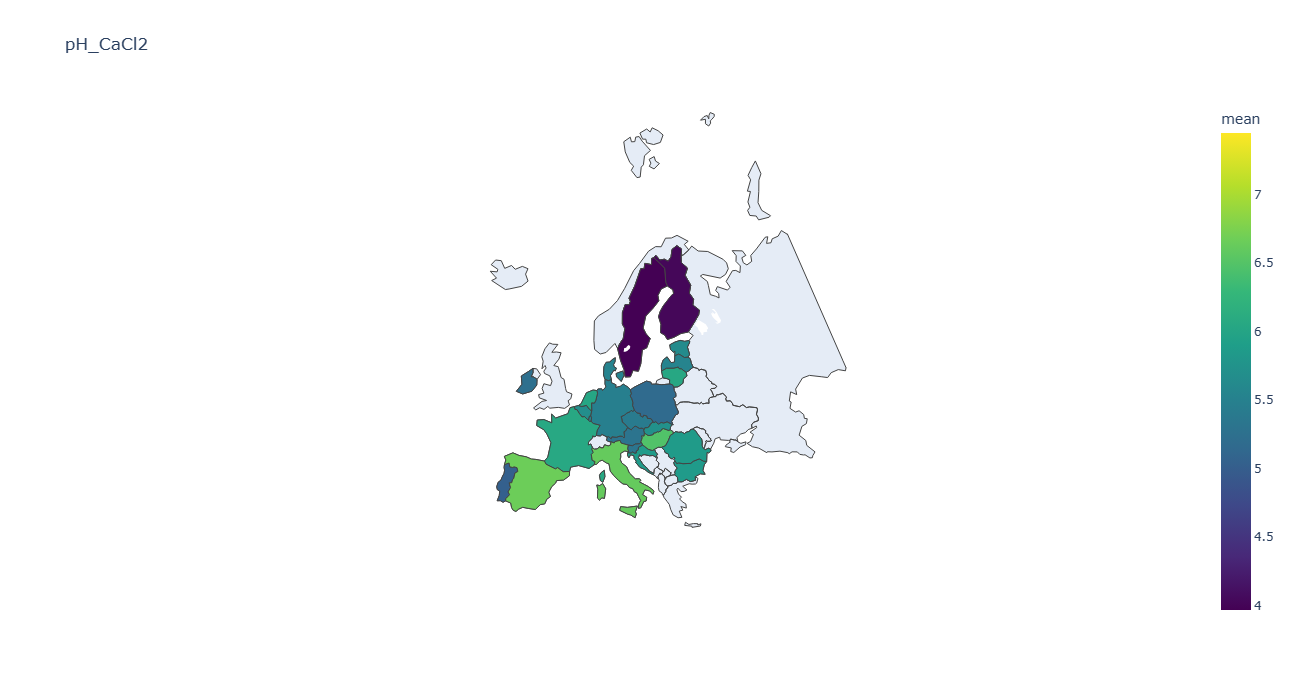

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


pH_H2O                                                   \
                    count      mean       std   min     25%    50%     75%   
COUNTRY                                                                      
Sweden             1906.0  4.703809  0.724073  3.38  4.2000  4.530  4.9900   
Finland            1143.0  4.756710  0.667219  3.37  4.2950  4.610  5.0500   
Poland             1376.0  5.664920  1.022708  3.57  4.8500  5.590  6.4000   
Ireland             143.0  5.693636  0.893637  3.75  5.1150  5.660  6.3500   
Portugal            428.0  5.755654  0.905091  4.03  5.0775  5.635  6.2700   
Slovenia            112.0  5.843482  1.091427  3.64  4.8575  5.920  6.9300   
Austria             449.0  5.857840  1.290156  3.63  4.7400  5.760  6.9500   
Czechia             445.0  5.993281  1.133131  3.34  5.3100  6.100  6.8200   
Germany             779.0  6.014390  1.114912  3.46  5.3000  6.130  6.8950   
Luxembourg           35.0  6.034571  0.939106  4.07  5.7350  6.270  6.5350   
Latvia              331.0  6.053172  1.044154  3.54  5.3300  6.240  6.9300   
Denmark             171.0  6.117602  0.804159  4.09  5.6550  6.130  6.5750   
Estonia             201.0  6.142637  0.980917  3.67  5.6200  6.310  6.9800   
Belgium             130.0  6.261231  1.148473  3.79  5.6800  6.750  7.0650   
Slovakia            186.0  6.319570  1.089962  3.43  5.4925  6.325  7.2675   
Croatia             106.0  6.333396  1.019559  4.05  5.5450  6.480  7.2025   
Romania             603.0  6.362554  0.959440  3.87  5.7050  6.270  7.2300   
Bulgaria            574.0  6.514216  0.961321  4.46  5.8125  6.430  7.2775   
France             2735.0  6.517514  1.057696  3.53  5.7600  6.580  7.4600   
Lithuania           386.0  6.524922  0.939494  3.75  5.9625  6.730  7.2800   
Netherlands (the)    99.0  6.565556  1.192764  3.60  5.8100  6.680  7.6400   
Hungary             354.0  7.086949  0.987251  4.01  6.5500  7.220  7.9200   
Italy              1242.0  7.090201  0.996057  3.86  6.4600  7.450  7.8600   
Spain              3867.0  7.178011  1.162210  3.82  6.3600  7.720  8.0400   
Cyprus               69.0  7.910145  0.333464  6.89  7.7200  7.940  8.1400   
Malta                 2.0  8.165000  0.021213  8.15  8.1575  8.165  8.1725   

                         
                    max  
COUNTRY                  
Sweden             7.70  
Finland            7.20  
Poland             9.07  
Ireland            7.78  
Portugal           8.35  
Slovenia           7.82  
Austria            8.30  
Czechia            8.39  
Germany            8.24  
Luxembourg         7.78  
Latvia             8.01  
Denmark            8.09  
Estonia            7.90  
Belgium            8.05  
Slovakia           8.21  
Croatia            8.12  
Romania            8.61  
Bulgaria           8.44  
France             8.52  
Lithuania          7.92  
Netherlands (the)  8.02  
Hungary            9.62  
Italy              8.80  
Spain              8.99  
Cyprus             8.72  
Malta              8.18

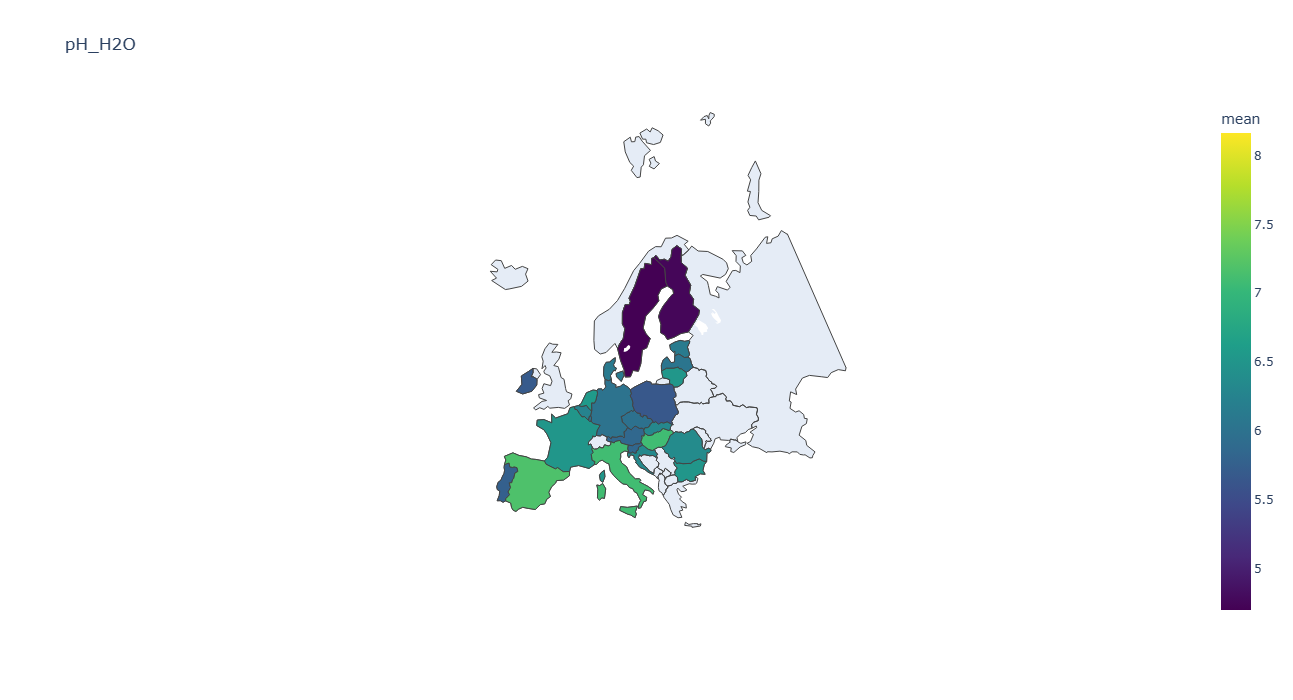

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EC                                                \
                    count       mean        std    min      25%     50%   
COUNTRY                                                                   
Finland            1143.0   9.426448   8.738262   1.47   3.7250   6.540   
Portugal            428.0   9.776647   8.046626   2.22   4.4800   6.430   
Bulgaria            574.0  11.232073   6.427121   2.89   6.3125   9.215   
Sweden             1900.0  12.826045  12.920436   1.97   5.0675   8.875   
Czechia             445.0  13.097708   6.793270   4.13   8.4400  11.260   
Luxembourg           35.0  13.892286   6.739026   5.54   9.6150  12.170   
Slovakia            186.0  14.111828   8.487399   3.41   7.2625  12.070   
Hungary             354.0  14.215989   8.410070   1.99   8.0900  13.215   
Poland             1376.0  15.539568  15.338935   2.22   6.8775  12.215   
Germany             779.0  16.052388  11.442098   2.82   8.6700  13.290   
France             2735.0  16.081289  11.836840   2.25   9.4700  13.990   
Denmark             171.0  16.462836  10.908517   3.77  10.2900  13.940   
Lithuania           386.0  16.536321  15.907060   2.44   8.0200  12.675   
Belgium             130.0  16.617615   9.802331   4.31  10.3200  13.855   
Latvia              331.0  17.209909  19.810184   2.17   7.0000  11.580   
Croatia             106.0  17.908868  11.431181   3.40   9.0400  15.420   
Netherlands (the)    99.0  18.002323  12.978981   0.24  10.8500  14.110   
Romania             603.0  18.387595  14.586564   2.37   8.4550  15.300   
Estonia             201.0  24.211866  25.716996   2.45   9.6200  15.950   
Slovenia            112.0  24.234152  23.352286   3.41  10.3450  19.265   
Italy              1240.0  24.501137  20.714486   3.99  14.3450  19.275   
Cyprus               69.0  24.570145  38.814163   3.99  15.5700  18.870   
Spain              3867.0  25.033574  45.693204   1.42  11.3200  16.040   
Austria             449.0  28.547906  22.128501   4.79  13.9700  22.300   
Ireland             143.0  36.620420  47.372470   5.63  15.4500  28.300   
Malta                 2.0  55.285000  48.953002  20.67  37.9775  55.285   

                                     
                       75%      max  
COUNTRY                              
Finland            11.7050   104.90  
Portugal           13.2100    64.59  
Bulgaria           14.6475    37.20  
Sweden             15.5500   132.60  
Czechia            16.5500    53.04  
Luxembourg         17.0750    33.73  
Slovakia           18.4075    44.80  
Hungary            18.0175    67.39  
Poland             18.3500   169.77  
Germany            20.2500   137.20  
France             19.7100   377.00  
Denmark            19.6150    84.62  
Lithuania          18.4825   135.10  
Belgium            19.6050    72.79  
Latvia             18.5800   138.40  
Croatia            23.5750    51.20  
Netherlands (the)  22.6050    77.89  
Romania            24.0500   182.20  
Estonia            24.9000   199.20  
Slovenia           26.6900   177.60  
Italy              26.9900   263.50  
Cyprus             24.0800   332.60  
Spain              21.9150  1295.60  
Austria            36.8000   172.60  
Ireland            45.3250   526.54  
Malta              72.5925    89.90

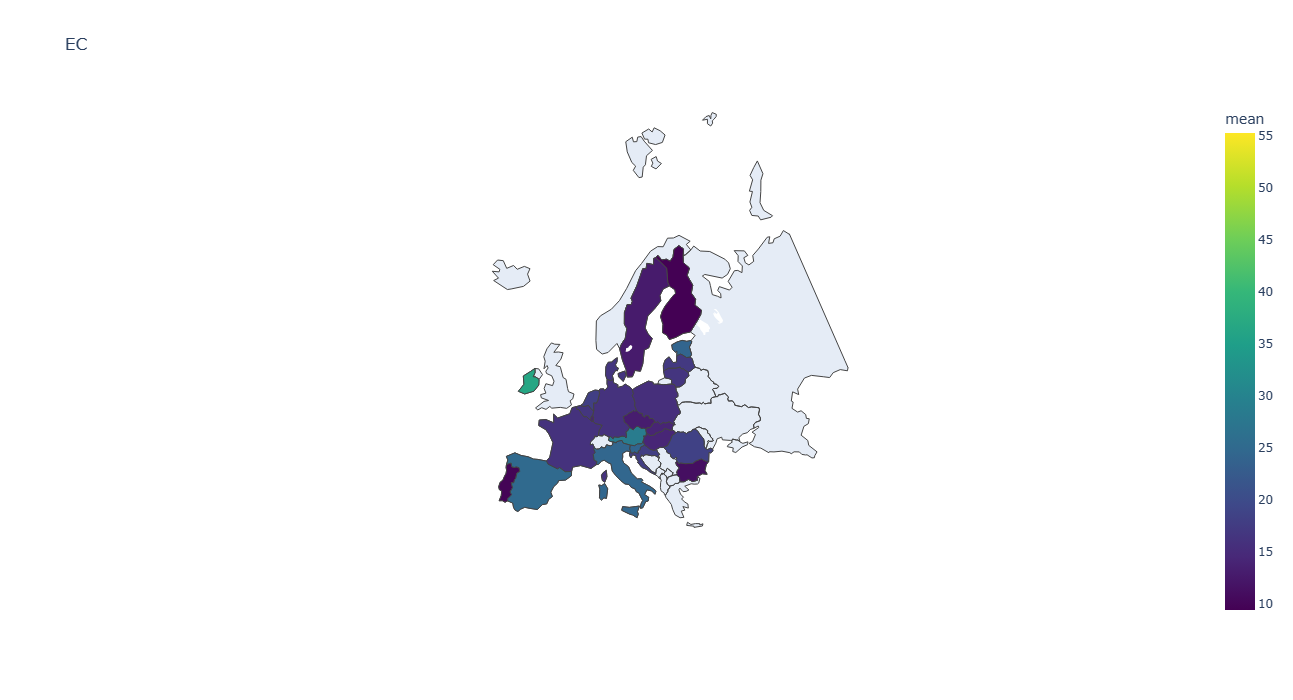

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


OC                                                     \
                   count        mean         std   min    25%   50%     75%   
COUNTRY                                                                       
Cyprus               7.0   14.000000    7.895146   6.0   8.50  12.0   18.00   
Belgium             15.0   17.800000   10.199440   8.0  10.50  11.0   24.50   
Hungary             37.0   20.189189   13.018871   4.0  11.00  18.0   27.00   
Poland             123.0   20.260163   43.115141   4.0   9.50  12.0   18.00   
Romania             43.0   20.534884   12.111287   4.0  16.00  19.0   22.00   
Bulgaria            61.0   20.754098   10.991900   6.0  15.00  18.0   22.00   
Denmark             12.0   24.916667   13.885626  10.0  15.75  21.0   26.25   
Spain              382.0   24.931937   30.138100   3.0   9.00  14.0   27.75   
Portugal            42.0   26.571429   30.020434   3.0   9.00  15.5   26.75   
Czechia             42.0   27.166667   30.374826  11.0  16.00  19.0   26.00   
Italy              103.0   29.747573   32.611714   3.0  12.00  20.0   37.00   
Netherlands (the)   13.0   30.538462   26.390072   6.0  12.00  19.0   32.00   
France             290.0   32.855172   41.162263   5.0  14.25  23.0   37.00   
Slovakia            19.0   33.000000   30.530495  11.0  18.50  23.0   31.50   
Luxembourg           5.0   33.800000   13.827509  19.0  24.00  32.0   40.00   
Lithuania           40.0   38.375000   77.362181   6.0  14.00  19.0   22.50   
Ireland              9.0   39.777778   13.908431  28.0  29.00  39.0   44.00   
Germany             81.0   40.567901   60.885946   6.0  15.00  22.0   36.00   
Croatia              7.0   51.000000   30.391885  15.0  25.50  56.0   69.00   
Latvia              37.0   65.837838  108.978212   9.0  19.00  26.0   38.00   
Slovenia            11.0   68.272727   48.280619  10.0  29.00  52.0  115.00   
Austria             41.0   81.146341   95.487842  12.0  22.00  40.0  105.00   
Estonia             24.0   88.166667  135.476828  12.0  21.75  28.5   55.75   
Finland            103.0  109.582524  143.780437   8.0  23.00  41.0  114.50   
Sweden             177.0  120.005650  148.538696   5.0  24.00  53.0  135.00   

                          
                     max  
COUNTRY                   
Cyprus              27.0  
Belgium             41.0  
Hungary             68.0  
Poland             440.0  
Romania             81.0  
Bulgaria            63.0  
Denmark             55.0  
Spain              300.0  
Portugal           137.0  
Czechia            208.0  
Italy              277.0  
Netherlands (the)   85.0  
France             473.0  
Slovakia           117.0  
Luxembourg          54.0  
Lithuania          379.0  
Ireland             70.0  
Germany            471.0  
Croatia             97.0  
Latvia             461.0  
Slovenia           137.0  
Austria            481.0  
Estonia            430.0  
Finland            526.0  
Sweden             527.0

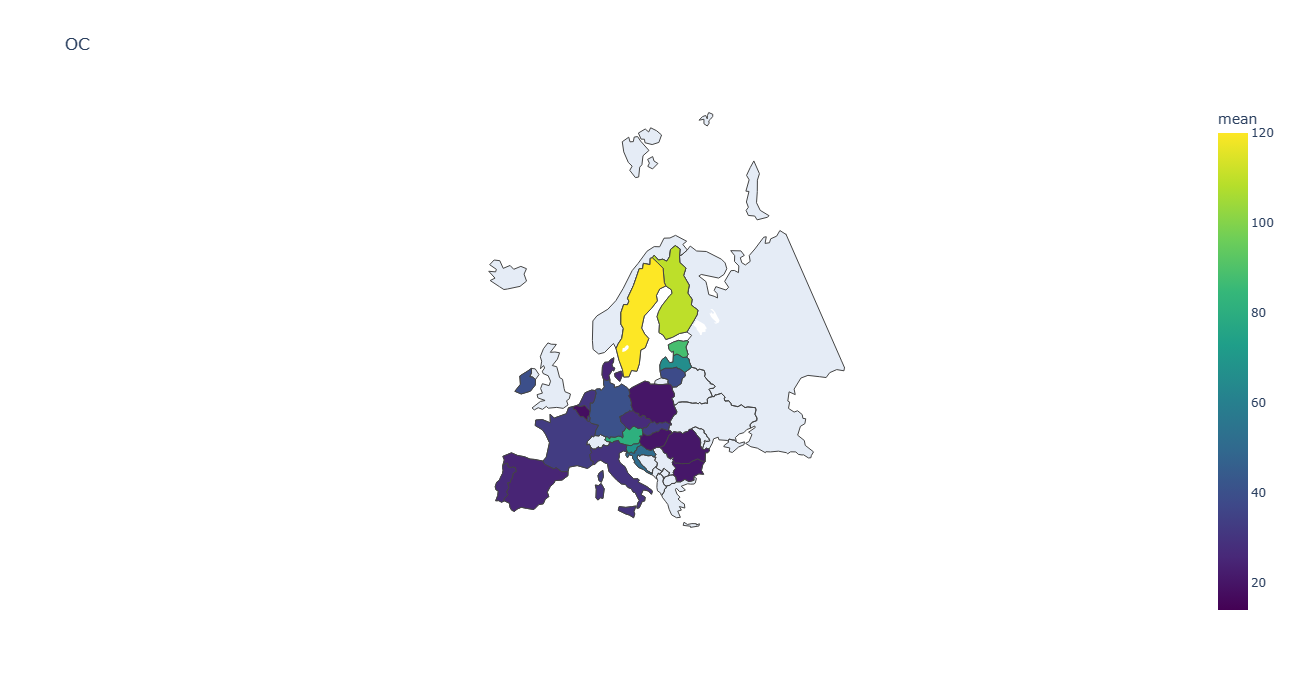

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


CaCO3                                                \
                    count        mean         std    min     25%    50%   
COUNTRY                                                                   
Finland             643.0    1.923795    1.214698    1.0    1.00    2.0   
Sweden             1022.0    3.230920   22.631951    1.0    1.00    1.0   
Latvia              160.0    6.806250   12.287180    1.0    1.00    2.0   
Belgium              51.0    9.607843   24.662586    1.0    1.00    2.0   
Estonia             135.0    9.859259   23.477891    1.0    1.00    2.0   
Poland              488.0   10.055328   36.357327    1.0    1.00    1.0   
Lithuania           198.0   10.863636   16.739163    1.0    1.00    5.0   
Denmark              33.0   12.212121   28.897186    1.0    1.00    2.0   
Czechia             159.0   12.415094   27.085729    1.0    1.00    2.0   
Slovenia             85.0   18.976471   37.892384    1.0    1.00    2.0   
Luxembourg           14.0   19.000000   38.864657    1.0    1.00    1.0   
Germany             351.0   19.022792   47.138756    1.0    1.00    2.0   
Ireland              47.0   20.595745   38.959656    1.0    1.50    3.0   
Romania             342.0   20.646199   44.464167    1.0    1.00    1.0   
Austria             262.0   28.198473   54.032262    1.0    1.00    3.0   
Netherlands (the)    62.0   29.209677   30.226542    1.0    2.00   21.0   
Bulgaria            271.0   34.878229   76.755093    1.0    1.00    4.0   
Croatia              64.0   42.593750   88.546951    1.0    1.00    4.0   
Slovakia             86.0   43.325581  111.417122    1.0    1.00    7.0   
Portugal            154.0   47.292208  140.962607    1.0    1.00    1.0   
Hungary             214.0   51.037383   74.618079    1.0    3.00   19.0   
France             1514.0  106.803831  179.758306    1.0    2.00    7.0   
Italy               994.0  107.277666  136.343774    1.0    4.00   53.0   
Spain              3191.0  206.899405  204.015900    1.0    5.00  162.0   
Cyprus               61.0  315.098361  283.466089    3.0   43.00  231.0   
Malta                 2.0  455.500000   14.849242  445.0  450.25  455.5   

                                  
                      75%    max  
COUNTRY                           
Finland              2.00    9.0  
Sweden               2.00  575.0  
Latvia               6.25   79.0  
Belgium              5.00  124.0  
Estonia              6.00  189.0  
Poland               3.00  550.0  
Lithuania           13.00  117.0  
Denmark              7.00  134.0  
Czechia              6.00  166.0  
Slovenia            19.00  211.0  
Luxembourg          11.75  123.0  
Germany              8.50  448.0  
Ireland             12.00  165.0  
Romania             22.75  491.0  
Austria             22.75  292.0  
Netherlands (the)   53.00  108.0  
Bulgaria            30.00  599.0  
Croatia             31.25  410.0  
Slovakia            37.25  873.0  
Portugal             3.00  743.0  
Hungary             74.00  501.0  
France             139.75  926.0  
Italy              166.75  818.0  
Spain              353.00  886.0  
Cyprus             591.00  838.0  
Malta              460.75  466.0

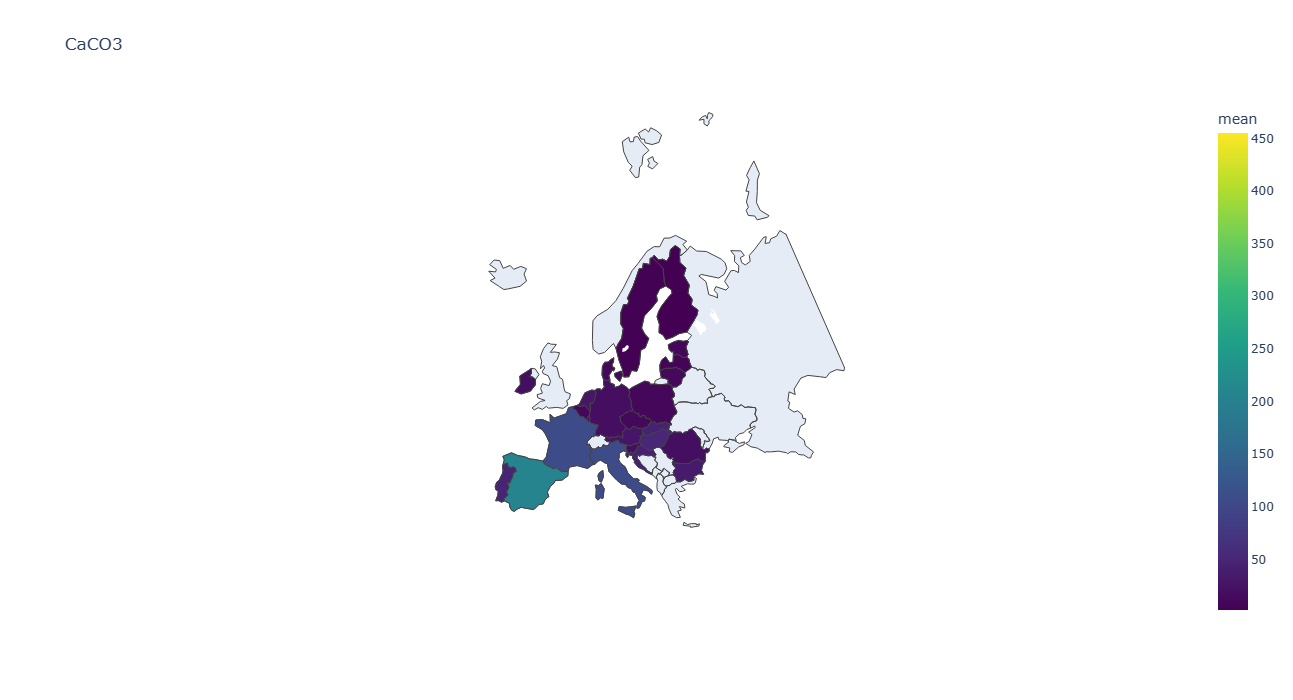

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


P                                                   \
                   count       mean        std   min    25%   50%     75%   
COUNTRY                                                                     
Croatia              2.0  13.500000   6.363961   9.0  11.25  13.5   15.75   
Lithuania           27.0  23.962963  17.243687  10.0  14.50  18.0   26.00   
Hungary             25.0  26.160000  20.951690  10.0  14.00  16.0   39.00   
Sweden             167.0  27.904192  20.009104  10.0  16.00  23.0   32.00   
Spain              244.0  28.483607  21.103794  10.0  14.00  21.5   34.00   
Romania             46.0  30.826087  33.454649   2.0   9.00  20.0   34.00   
Luxembourg           6.0  32.000000  30.423675  10.0  12.25  24.0   32.00   
Finland             77.0  32.454545  24.775065  10.0  16.00  24.0   39.00   
Estonia             18.0  32.611111  17.469768  14.0  20.50  24.0   44.00   
Italy               67.0  33.671642  39.540692  10.0  14.00  20.0   31.50   
Bulgaria            22.0  34.136364  25.387090  11.0  17.25  22.0   46.50   
France             247.0  34.340081  23.098713  10.0  19.50  27.0   43.50   
Austria             35.0  35.285714  36.214696  10.0  15.00  25.0   40.50   
Latvia              18.0  36.055556  28.763687  10.0  13.25  20.0   57.50   
Czechia             36.0  36.416667  19.805302  10.0  19.75  36.0   49.25   
Slovenia             2.0  38.000000  12.727922  29.0  33.50  38.0   42.50   
Poland             136.0  39.073529  23.222158   5.0  21.00  37.0   52.25   
Portugal            18.0  40.611111  32.024143  10.0  18.50  26.0   55.50   
Ireland             11.0  40.727273  25.163827  18.0  21.50  42.0   48.50   
Slovakia             8.0  50.250000  49.204384  10.0  16.50  35.0   60.25   
Germany             67.0  50.522388  34.366279  10.0  21.00  46.0   68.00   
Denmark             16.0  51.187500  24.836046  19.0  31.50  47.5   75.25   
Belgium             19.0  73.631579  62.319259  11.0  27.50  50.0  120.00   
Cyprus               5.0  89.200000  64.064030  11.0  45.00  93.0  123.00   
Netherlands (the)    9.0  92.222222  68.117138  12.0  55.00  63.0  134.00   

                          
                     max  
COUNTRY                   
Croatia             18.0  
Lithuania           90.0  
Hungary            104.0  
Sweden             172.0  
Spain              142.0  
Romania            160.0  
Luxembourg          91.0  
Finland            150.0  
Estonia             72.0  
Italy              258.0  
Bulgaria           114.0  
France             152.0  
Austria            209.0  
Latvia              99.0  
Czechia             84.0  
Slovenia            47.0  
Poland             126.0  
Portugal           132.0  
Ireland            106.0  
Slovakia           159.0  
Germany            158.0  
Denmark             90.0  
Belgium            250.0  
Cyprus             174.0  
Netherlands (the)  236.0

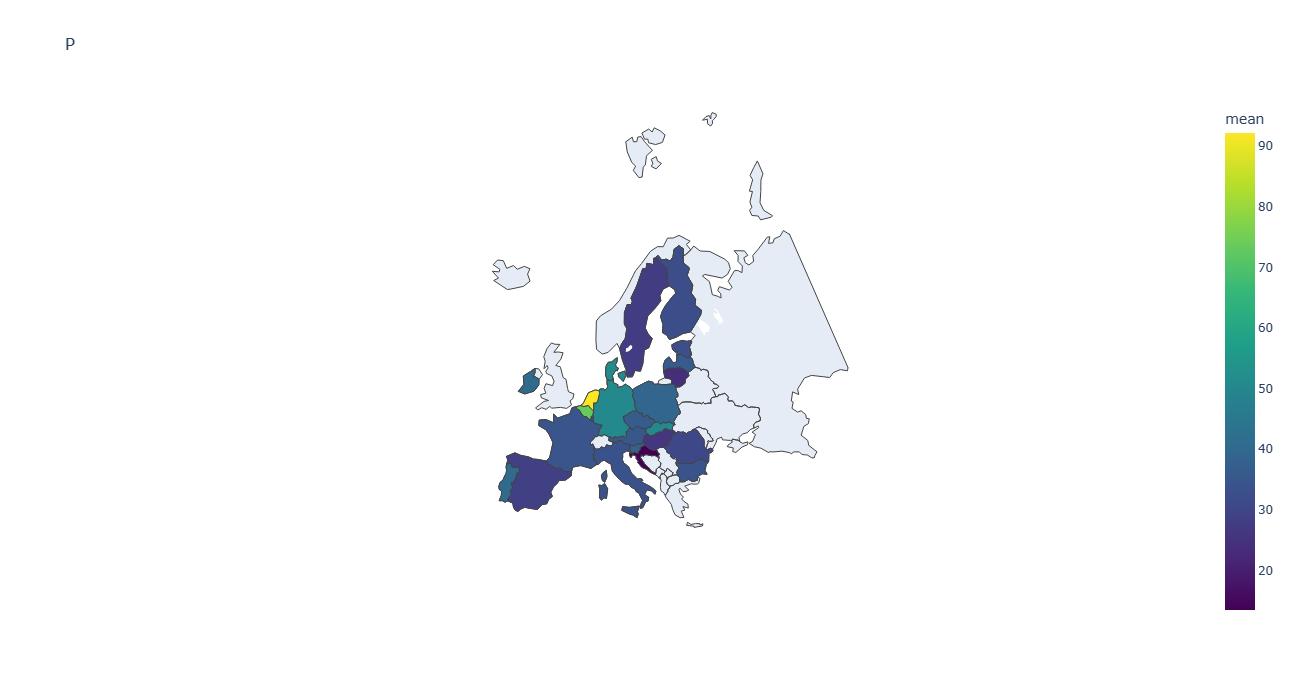

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


N                                                 
                   count      mean       std  min   25%  50%    75%   max
COUNTRY                                                                  
Cyprus               8.0  1.250000  0.462910  1.0  1.00  1.0   1.25   2.0
Poland             169.0  1.875740  3.259045  1.0  1.00  1.0   2.00  36.0
Spain              390.0  2.061538  1.839668  1.0  1.00  1.0   2.00  20.0
Hungary             35.0  2.114286  1.430167  1.0  1.50  2.0   2.00   9.0
Romania             69.0  2.130435  1.187100  1.0  2.00  2.0   2.00   9.0
Bulgaria            72.0  2.138889  0.892939  1.0  2.00  2.0   3.00   5.0
Portugal            44.0  2.181818  1.385519  1.0  1.00  2.0   3.00   6.0
Netherlands (the)    4.0  2.250000  0.957427  1.0  1.75  2.5   3.00   3.0
Italy               99.0  2.424242  1.471435  1.0  1.00  2.0   3.00   8.0
Czechia             42.0  2.500000  1.109823  1.0  2.00  2.0   3.00   7.0
Denmark             22.0  2.772727  1.900672  1.0  2.00  2.0   3.00  10.0
Belgium             11.0  2.909091  1.578261  1.0  2.00  3.0   3.50   6.0
Germany             80.0  2.925000  2.727149  1.0  1.00  2.0   4.00  14.0
Slovakia            15.0  2.933333  0.961150  2.0  2.00  3.0   3.50   5.0
France             252.0  3.103175  2.257628  1.0  2.00  3.0   4.00  21.0
Croatia              8.0  3.500000  1.772811  1.0  2.50  4.0   4.25   6.0
Luxembourg           5.0  3.600000  2.073644  2.0  2.00  3.0   4.00   7.0
Lithuania           31.0  3.870968  4.971532  1.0  2.00  2.0   3.50  27.0
Latvia              33.0  3.909091  3.777926  1.0  2.00  2.0   4.00  15.0
Finland            113.0  4.761062  5.744989  1.0  1.00  2.0   5.00  24.0
Slovenia             6.0  4.833333  1.834848  2.0  4.00  5.0   6.00   7.0
Austria             40.0  5.475000  5.139029  1.0  2.00  3.5   6.25  22.0
Estonia             14.0  5.500000  5.932310  1.0  2.00  3.0   7.50  24.0
Sweden             178.0  6.067416  6.305406  1.0  2.00  3.0   9.75  28.0
Ireland             16.0  9.437500  6.673018  3.0  5.00  6.5  14.25  25.0

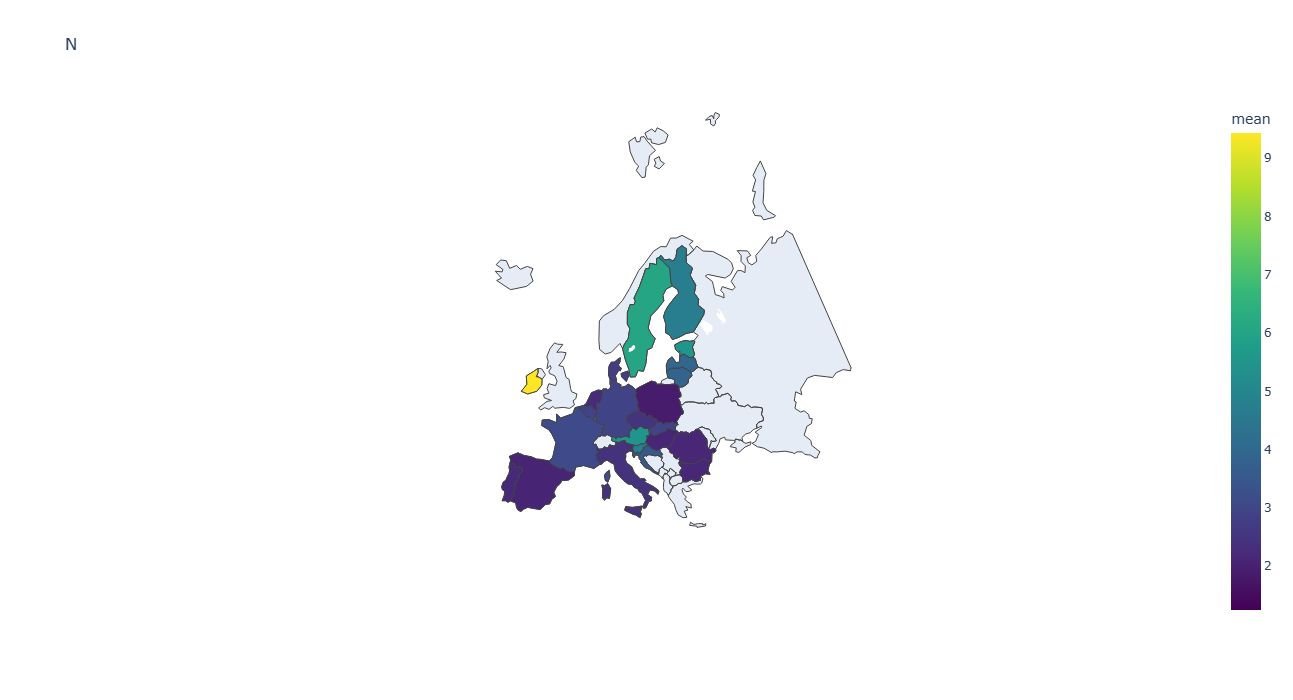

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


K                                                \
                   count        mean         std    min     25%    50%   
COUNTRY                                                                  
Latvia              38.0   85.526316   46.648621   26.0   52.00   74.5   
Portugal            39.0   96.512821   58.161242   27.0   53.50   74.0   
Luxembourg           2.0   97.000000   25.455844   79.0   88.00   97.0   
Finland            102.0  106.696078  111.530113   12.0   40.25   61.0   
Sweden             196.0  115.198980  105.541807   12.0   46.00   74.5   
Denmark             20.0  115.300000   54.197592   31.0   74.50  100.5   
Poland             131.0  115.381679  173.159129    8.0   37.50   86.0   
Netherlands (the)   11.0  130.363636  111.165888   30.0   62.50   75.0   
Lithuania           28.0  143.785714   70.780494   51.0   84.75  125.5   
Germany             91.0  163.351648  130.343680   14.0   67.00  117.0   
Czechia             41.0  166.146341  128.446985   53.0   89.00  134.0   
Austria             36.0  167.750000  118.454422   43.0   90.75  119.0   
Slovenia            11.0  174.545455   89.898124   69.0  105.50  141.0   
Estonia             17.0  188.764706  134.903451   32.0   88.00  139.0   
Romania             65.0  193.707692  108.336242   12.0  125.00  175.0   
Belgium              6.0  194.500000  111.460755  101.0  124.50  165.5   
Slovakia            16.0  211.562500  128.426876   55.0  115.25  179.5   
Ireland             16.0  213.562500  147.135751   46.0   90.75  181.5   
France             278.0  231.046763  159.613821   29.0  131.00  192.0   
Croatia             17.0  247.058824  141.515666   42.0  167.00  227.0   
Spain              410.0  250.646341  178.325255   36.0  123.25  205.5   
Hungary             36.0  252.888889  142.092883   32.0  162.25  218.0   
Bulgaria            62.0  261.112903  273.442541   57.0  152.25  205.0   
Cyprus               7.0  375.000000  158.991614  166.0  284.00  335.0   
Italy              154.0  384.246753  392.692238   32.0  154.50  275.0   

                                   
                      75%     max  
COUNTRY                            
Latvia             118.50   218.0  
Portugal           132.00   221.0  
Luxembourg         106.00   115.0  
Finland            137.75   715.0  
Sweden             152.25   713.0  
Denmark            152.50   222.0  
Poland             136.00  1824.0  
Netherlands (the)  177.00   384.0  
Lithuania          183.25   300.0  
Germany            232.00   557.0  
Czechia            195.00   733.0  
Austria            198.75   642.0  
Slovenia           225.00   372.0  
Estonia            299.00   504.0  
Romania            235.00   623.0  
Belgium            205.75   405.0  
Slovakia           242.25   560.0  
Ireland            278.75   506.0  
France             280.75  1117.0  
Croatia            326.00   591.0  
Spain              333.75  1167.0  
Hungary            326.50   572.0  
Bulgaria           301.75  2151.0  
Cyprus             471.00   614.0  
Italy              433.75  2708.0

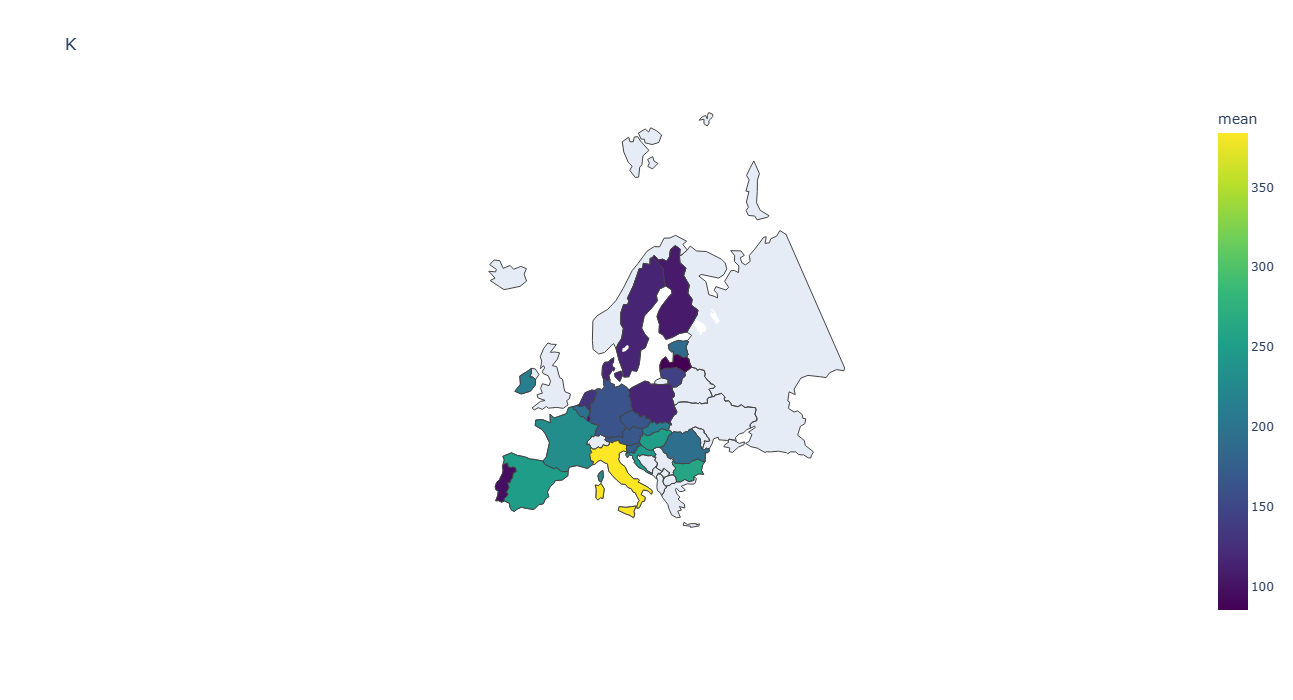

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [8]:
# See Numeric Descriptive Statistics of each country
list_variables = ['pH_CaCl2','pH_H2O','EC','OC','CaCO3','P','N','K']
for var in list_variables:
    try :
        df_temp = df.loc[df[var].str.isnumeric().fillna(False)]
        df_temp[var] = df_temp[var].astype(float) 
    except :
        df_temp = df.copy()
    display(df_temp.groupby('COUNTRY')[[var]].describe().sort_values((var,'mean')))
    
    fig_map = px.choropleth(df_temp.groupby('COUNTRY')[[var]].describe()[(var,'mean')].to_frame('mean').reset_index(), 
                        locations='COUNTRY', 
                        locationmode='country names',
                        color='mean',
                        color_continuous_scale='Viridis',title=var)
    fig_map.update_layout(geo_scope='europe')
    fig_map.update_layout(height=700, width=1200)
    fig_map.show()
    print("-"*170)
    print("-"*170)

# LUCAS2018_ORG.csv

In [9]:
pd.read_csv('LUCAS-SOIL-2018-v2/LUCAS2018_ORG.csv')

POINT_ID  SURVEY_SOIL_ORG_CULTIVATED  SURVEY_SOIL_ORG_DEPTH_P_CM  \
0     27602150                           1                         NaN   
1     27842394                           2                         NaN   
2     27842416                           2                        18.0   
3     27942164                           2                        23.0   
4     28002400                           1                         NaN   
...        ...                         ...                         ...   
1045  54203812                           2                         NaN   
1046  54223834                           2                         NaN   
1047  54263840                           2                         NaN   
1048  54761846                           2                        19.0   
1049  55061782                           2                        20.0   

      SURVEY_SOIL_ORG_DEPTH_N_CM  SURVEY_SOIL_ORG_DEPTH_E_CM  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                           23.0                         NaN   
3                           16.0                        18.0   
4                            NaN                         NaN   
...                          ...                         ...   
1045                         NaN                         NaN   
1046                         NaN                         NaN   
1047                         NaN                         NaN   
1048                        16.0                         NaN   
1049                        15.0                         NaN   

      SURVEY_SOIL_ORG_DEPTH_S_CM  SURVEY_SOIL_ORG_DEPTH_W_CM  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                           21.0                         NaN   
3                           20.0                        14.0   
4                            NaN                         NaN   
...                          ...                         ...   
1045                         NaN                         NaN   
1046                         NaN                         NaN   
1047                         NaN                         NaN   
1048                        18.0                         NaN   
1049                        20.0                         NaN   

      SURVEY_SOIL_ORG_DEPTH_P_40_CM  SURVEY_SOIL_ORG_DEPTH_N_40_CM  \
0                               1.0                            1.0   
1                               1.0                            1.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               1.0                            1.0   
...                             ...                            ...   
1045                            1.0                            1.0   
1046                            1.0                            1.0   
1047                            1.0                            1.0   
1048                            NaN                            NaN   
1049                            NaN                            NaN   

      SURVEY_SOIL_ORG_DEPTH_E_40_CM  SURVEY_SOIL_ORG_DEPTH_S_40_CM  \
0                               1.0                            1.0   
1                               0.0                            1.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            1.0   
...                             ...                            ...   
1045                            NaN                            1.0   
1046                            NaN                            1.0   
1047                            1.0                            NaN   
1048                            NaN   

# Erosion

In [10]:
pd.read_csv('LUCAS-SOIL-2018-v2/LUCAS2018_EROSION.csv')

POINT_ID  SURVEY_EROSION_SIGNS  SURVEY_EROSION_SHEET  \
0    37963072                     1                   NaN   
1    55762590                     1                   NaN   
2    64061606                     1                   NaN   
3    26761786                     1                   NaN   
4    26881988                     1                   NaN   
..        ...                   ...                   ...   
874  64461632                     1                   NaN   
875  64541646                     1                   NaN   
876  64581660                     1                   NaN   
877  64621658                     1                   NaN   
878  64661656                     1                   NaN   

     SURVEY_EROSION_SHEET_P  SURVEY_EROSION_SHEET_N  SURVEY_EROSION_SHEET_E  \
0                       1.0                     0.0                     0.0   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       0.0                     0.0                     0.0   
4                       1.0                     0.0                     0.0   
..                      ...                     ...                     ...   
874                     NaN                     NaN                     NaN   
875                     NaN                     NaN                     NaN   
876                     NaN                     NaN                     NaN   
877                     NaN                     NaN                     NaN   
878                     NaN                     NaN                     NaN   

     SURVEY_EROSION_SHEET_S  SURVEY_EROSION_SHEET_W  SURVEY_EROSION_SHEET_NR  \
0                       0.0                     0.0                      NaN   
1                       NaN                     NaN                      NaN   
2                       NaN                     NaN                      NaN   
3                       0.0                     0.0                      NaN   
4                       0.0                     0.0                      NaN   
..                      ...                     ...                      ...   
874                     NaN                     NaN                      NaN   
875                     NaN                     NaN                      NaN   
876                     NaN                     NaN                      NaN   
877                     NaN                     NaN                      NaN   
878                     NaN                     NaN                      NaN   

     SURVEY_EROSION_SHEET_N_DIST_M  SURVEY_EROSION_SHEET_E_DIST_M  \
0                              NaN                            NaN   
1                             25.0                            0.0   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   
..                             ...                            ...   
874                            NaN                            NaN   
875                            NaN                            NaN   
876                            NaN                            NaN   
877                            NaN                            NaN   
878                            NaN                            NaN   

     SURVEY_EROSION_SHEET_S_DIST_M  SURVEY_EROSION_SHEET_W_DIST_M  \
0                              NaN                            NaN   
1                             10.0                            0.0   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   
..                             ...                            ...   
874                            NaN                

# 2015 data

In [11]:
df_2018 = pd.read_csv('LUCAS-SOIL-2018-v2/LUCAS-SOIL-2018.csv')
df_2015 = pd.read_csv('LUCAS2015_topsoildata_20200323/LUCAS_Topsoil_2015_20200323.csv')

In [12]:
df_2018

Depth   POINTID  pH_CaCl2  pH_H2O      EC    OC CaCO3      P     N  \
0      0-20 cm  47862690       4.1    4.81    8.73  12.4     3  < LOD   1.1   
1      0-20 cm  47882704       4.1    4.93    5.06  16.7     1  < LOD   1.3   
2      0-20 cm  47982688       4.1    4.85   12.53  47.5     1   12.3   3.1   
3      0-20 cm  48022702       5.5    5.80   21.10  28.1     3  < LOD     2   
4      0-20 cm  48062708       6.1    6.48   10.89  19.4     2  < LOD   2.2   
...        ...       ...       ...     ...     ...   ...   ...    ...   ...   
18979  0-20 cm  32643634       6.0    6.13   91.40  51.4     2   92.2   5.3   
18980  0-20 cm  32703676       4.9    5.14   51.78  73.9   NaN   81.6   6.9   
18981  0-20 cm  32783608       5.5    5.94   22.40  63.7     1  101.9   6.7   
18982  0-20 cm  32783636       5.3    5.90   10.42  38.3     1    7.3   3.1   
18983  0-20 cm  33023682       4.7    4.97  141.70  98.7     1   33.7  10.1   

            K OC (20-30 cm)  CaCO3 (20-30 cm)  Ox_Al  Ox_Fe NUTS_0 NUTS_1  \
0       101.9           NaN               NaN    NaN    NaN     AT    AT1   
1        51.2           NaN               NaN    NaN    NaN     AT    AT1   
2       114.8           NaN               NaN    NaN    NaN     AT    AT1   
3       165.8           NaN               NaN    NaN    NaN     AT    AT1   
4        42.1           NaN               NaN    NaN    NaN     AT    AT1   
...       ...           ...               ...    ...    ...    ...    ...   
18979  1036.9           NaN               NaN    NaN    NaN     UK    UKN   
18980     225           NaN               NaN    NaN    NaN     UK    UKN   
18981   569.5           NaN               NaN    NaN    NaN     UK    UKN   
18982  1907.9           NaN               NaN    NaN    NaN     UK    UKN   
18983   231.1           NaN               NaN    NaN    NaN     UK    UKN   

      NUTS_2 NUTS_3     TH_LAT    TH_LONG SURVEY_DATE  Elev   LC    LU  \
0       AT11  AT113  47.150238  16.134212    06-07-18   291  C23  U120   
1       AT11  AT113  47.274272  16.175359    06-07-18   373  C21  U120   
2       AT11  AT113  47.123260  16.289693    02-06-18   246  C33  U120   
3       AT11  AT113  47.245693  16.357506    06-07-18   305  C22  U120   
4       AT11  AT113  47.296372  16.416782    05-07-18   335  C22  U120   
...      ...    ...        ...        ...         ...   ...  ...   ...   
18979   UKN1  UKN11  54.713343  -6.563749    24-07-18    50  E20  U111   
18980   UKN1  UKN12  55.091488  -6.625119    02-08-18    34  B55  U111   
18981   UKN1  UKN14  54.515104  -6.259448    18-06-18    50  E20  U111   
18982   UKN1  UKN13  54.759266  -6.358608    05-06-18   122  E20  U370   
18983   UKN1  UKN12  55.208730  -6.156597    28-06-18   143  E20  U111   

        LC0_Desc                              LC1_Desc  \
0       Woodland             Other coniferous woodland   
1       Woodland  Spruce dominated coniferous woodland   
2       Woodland                  Other mixed woodland   
3       Woodland    Pine dominated coniferous woodland   
4       Woodland    Pine dominated coniferous woodland   
...          ...                                   ...   
18979  Grassland    Grassland without tree/shrub cover   
18980   Cropland                   Temporary grassland   
18981  Grassland    Grassland without tree/shrub cover   
18982  Grassland    Grassland without tree/shrub cover   
18983  Grassland    Grassland without tree/shrub cover   

                                                LU1_Desc  
0                                               Forestry  
1                                               Forestry  
2                                               Forestry  
3                                               Forestry  
4                                               Forestry  
...                                                  ...  
18979  Agriculture (excluding fallow land and kitchen...  
18980  Agriculture (excluding fallow land and kitchen...  
18981  Agriculture

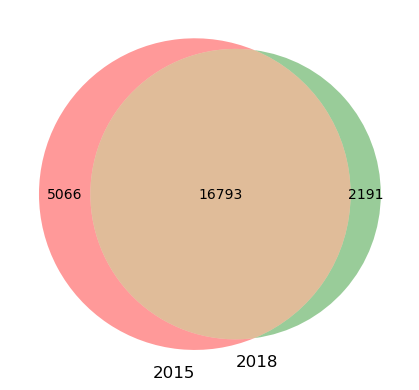

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

venn2([set(df_2015['Point_ID']),set(df_2018['POINTID'])], ('2015', '2018'))


In [15]:
df_2015

Point_ID Revisited_point  Coarse  Clay  Sand  Silt  pH(CaCl2)  pH(H2O)  \
0      34103754              No     NaN   NaN   NaN   NaN        3.9     3.91   
1      34443774              No     NaN   NaN   NaN   NaN        3.1     3.91   
2      35163814              No     NaN   NaN   NaN   NaN        4.9     5.48   
3      32323656              No     NaN   NaN   NaN   NaN        3.0     3.76   
4      34463934              No    28.0  10.0  46.0  44.0        3.9     4.04   
...         ...             ...     ...   ...   ...   ...        ...      ...   
21854  45402772             Yes     NaN   NaN   NaN   NaN        6.9     7.03   
21855  47722672             Yes     NaN   NaN   NaN   NaN        5.7     5.98   
21856  45882618             Yes     NaN   NaN   NaN   NaN        6.8     6.99   
21857  45342706             Yes     NaN   NaN   NaN   NaN        6.0     6.12   
21858  47742660             Yes     NaN   NaN   NaN   NaN        4.2     4.68   

          EC     OC  CaCO3      P     N      K  Elevation  LC1   LU1  \
0      44.20   25.5      0   42.9   2.8   24.6        158  H11  U420   
1      46.40  503.5      0  164.9  19.9  460.3        500  H12  U420   
2      15.85   51.4      0   26.9   4.3  173.2        404  H11  U420   
3      26.90  470.3      0  102.8  16.1  313.0        364  H12  U150   
4      28.40   43.1      1    6.3   2.3   38.6        315  D20  U111   
...      ...    ...    ...    ...   ...    ...        ...  ...   ...   
21854  81.00   49.9      8   49.3   5.6  200.1        477  E20  U111   
21855  22.30   19.4      0   58.0   2.4  244.9        323  E20  U111   
21856  65.10   53.9      3   16.6   5.9   90.0        630  E20  U111   
21857  30.70   24.2      0    4.6   3.2   32.7        719  E20  U111   
21858   7.30   26.0      0    9.6   2.2  162.0        344  C10  U120   

       Soil_Stones NUTS_0 NUTS_1 NUTS_2 NUTS_3  \
0                1     UK    UKM   UKM8  UKM81   
1                1     UK    UKM   UKM7  UKM77   
2                1     UK    UKM   UKM7  UKM71   
3                1     UK    UKN   UKN1  UKN10   
4                2     UK    UKM   UKM6  UKM61   
...            ...    ...    ...    ...    ...   
21854            3     AT    AT3   AT32  AT323   
21855            1     AT    AT2   AT22  AT224   
21856            1     AT    AT2   AT21  AT212   
21857            1     AT    AT3   AT32  AT322   
21858            1     AT    AT2   AT22  AT224   

                                 LC1_Desc  \
0                          Inland marshes   
1                                Peatbogs   
2                          Inland marshes   
3                                Peatbogs   
4            Shrubland without tree cover   
...                                   ...   
21854  Grassland without tree/shrub cover   
21855  Grassland without tree/shrub cover   
21856  Grassland without tree/shrub cover   
21857  Grassland without tree/shrub cover   
21858                Broadleaved woodland   

                                                LU1_Desc  
0              Semi-natural and natural areas not in use  
1              Semi-natural and natural areas not in use  
2              Semi-natural and natural areas not in use  
3                               OTHER PRIMARY PRODUCTION  
4      Agriculture (excluding fallow land and kitchen...  
...                                                  ...  
21854  Agriculture (excluding fallow land and kitchen...  
21855  Agriculture (excluding fallow land and kitchen...  
21856  Agriculture (excluding fallow land and kitchen...  
21857  Agriculture (excluding fallow land and kitchen...  
21858                                           FORESTRY  

[21859 rows x 24 columns]

SyntaxError: invalid syntax (562099293.py, line 1)